# Time series analysis in Python

## Libraries

In [1]:
import numpy as np  # vectors and matrices
import pandas as pd  # tables and data manipulations

import matplotlib as mpl
import matplotlib.pyplot as plt  # plots
import seaborn as sns  # more plots

from itertools import product  # some useful functions

import scipy.stats as scs
from scipy.optimize import minimize  # for function minimization

import statsmodels.api as sm
import statsmodels.formula.api as smf  # statistics and econometrics
import statsmodels.tsa.api as smt

from sklearn import metrics

from dateutil.relativedelta import relativedelta  # working with dates with style

from tqdm.notebook import tqdm

%matplotlib inline
#sns.set_style('darkgrid')
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#mpl.rc_params_from_file("seaborn-darkgrid",True,False)

## Parameters

In [2]:
DATA_PATH = '../../data/'

## Plots customization

In [3]:
color_1 = '#263238'
color_2 = '#eeffff'

for param in ['figure.facecolor', 'savefig.facecolor', 'axes.facecolor']:
    plt.rcParams[param] = color_1

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'grid.color', 'axes.edgecolor', 'grid.color']:
    plt.rcParams[param] = color_2
    
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.axisbelow'] = True

plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.linewidth'] = 2

## Data

In [4]:
ads = pd.read_csv(
    DATA_PATH + "ads.csv",
    index_col=["Time"],
    parse_dates=["Time"]
)

currency = pd.read_csv(
    DATA_PATH + "currency.csv",
    index_col=["Time"],
    parse_dates=["Time"],
    date_format="mixed",
    dayfirst=False,
)

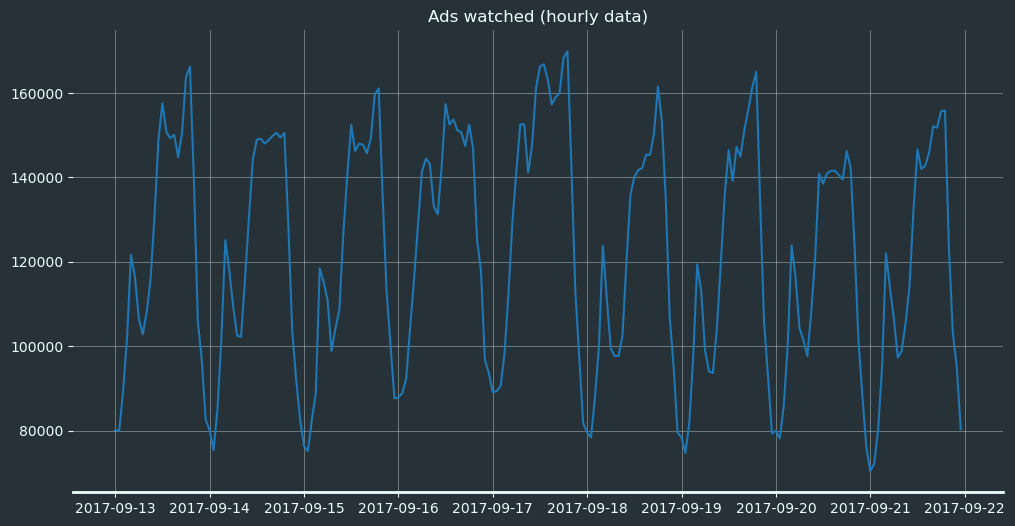

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(ads.Ads)
plt.title("Ads watched (hourly data)")
plt.grid(True)
plt.show()

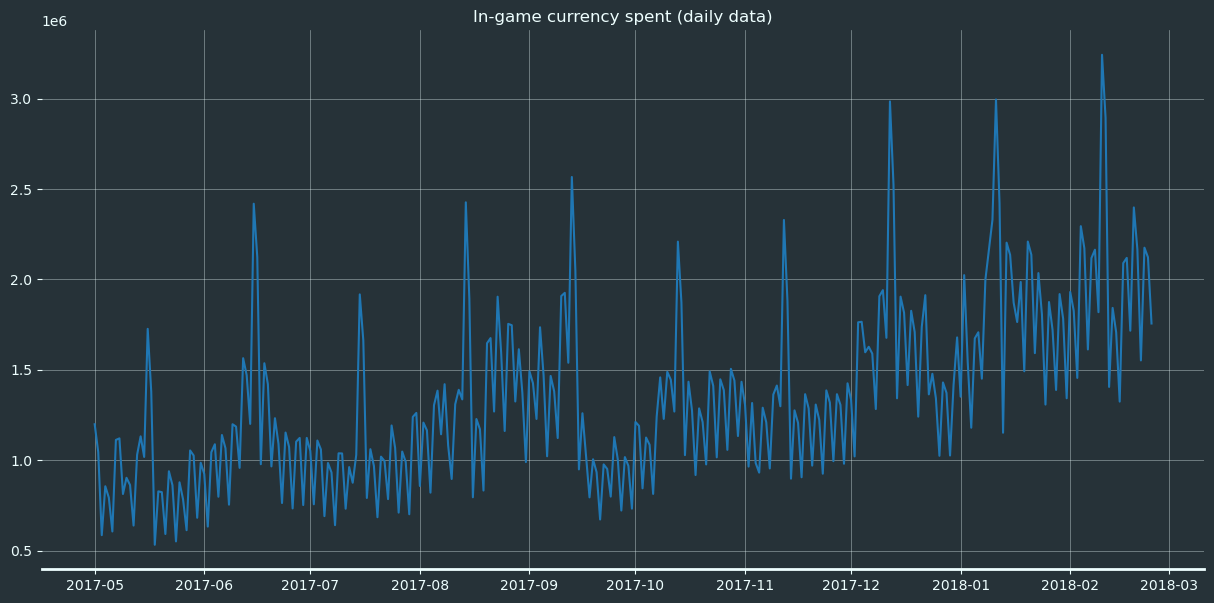

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title("In-game currency spent (daily data)")
plt.grid(True)
plt.show()

## Forecast quality metrics

In [7]:
metrics.r2_score?

Signature:
metrics.r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    force_finite=True,
)
Docstring:
:math:`R^2` (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). In the general case when the true y is
non-constant, a constant model that always predicts the average y
disregarding the input features would get a :math:`R^2` score of 0.0.

In the particular case when ``y_true`` is constant, the :math:`R^2` score
is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
(imperfect predictions). To prevent such non-finite numbers to pollute
higher-level experiments such as a grid search cross-validation, by default
these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
predictions) respectively. You can set ``force_finite`` to ``False`` to
prevent this fix from happening.

Note: when the prediction resid

In [8]:
metrics.mean_absolute_error?

Signature:
metrics.mean_absolute_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean absolute error regression loss.

Read more in the :ref:`User Guide <mean_absolute_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'}  or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

Returns
-------
loss : float or 

In [9]:
metrics.median_absolute_error?

Signature:
metrics.median_absolute_error(
    y_true,
    y_pred,
    *,
    multioutput='uniform_average',
    sample_weight=None,
)
Docstring:
Median absolute error regression loss.

Median absolute error output is non-negative floating point. The best value
is 0.0. Read more in the :ref:`User Guide <median_absolute_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values. Array-like value defines
    weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

sample_weight : array-like 

In [10]:
metrics.mean_squared_error?

Signature:
metrics.mean_squared_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    squared='deprecated',
)
Docstring:
Mean squared error regression loss.

Read more in the :ref:`User Guide <mean_squared_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

squared : 

In [11]:
metrics.mean_squared_log_error?

Signature:
metrics.mean_squared_log_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    squared='deprecated',
)
Docstring:
Mean squared logarithmic error regression loss.

Read more in the :ref:`User Guide <mean_squared_log_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'

    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors when the input is of multioutput
        format.

    'uniform_average' :
        Errors of all outputs are a

In [12]:
metrics.mean_absolute_percentage_error?

Signature:
metrics.mean_absolute_percentage_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean absolute percentage error (MAPE) regression loss.

Note here that the output is not a percentage in the range [0, 100]
and a value of 100 does not mean 100% but 1e2. Furthermore, the output
can be arbitrarily high when `y_true` is small (which is specific to the
metric) or when `abs(y_true - y_pred)` is large (which is common for most
regression metrics). Read more in the
:ref:`User Guide <mean_absolute_percentage_error>`.

.. versionadded:: 0.24

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'} or array-like
    Defines 

## Move, smoothe, evaluate

In [13]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])


moving_average(ads, 24)  # prediction for the last observed day (past 24 hours)

np.float64(116805.0)

In [14]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = metrics.mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:], axis=0)
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

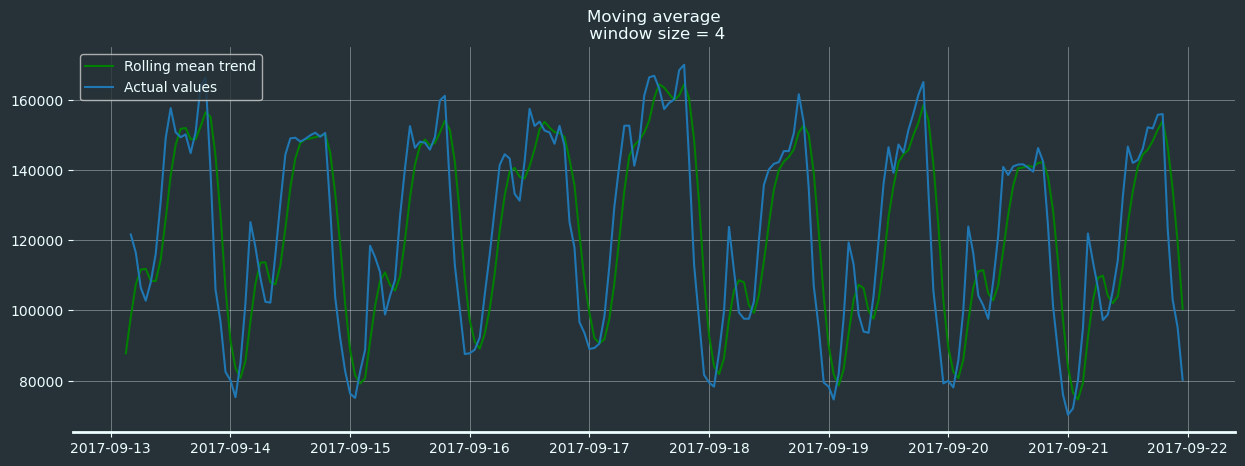

In [15]:
plotMovingAverage(ads, 4)

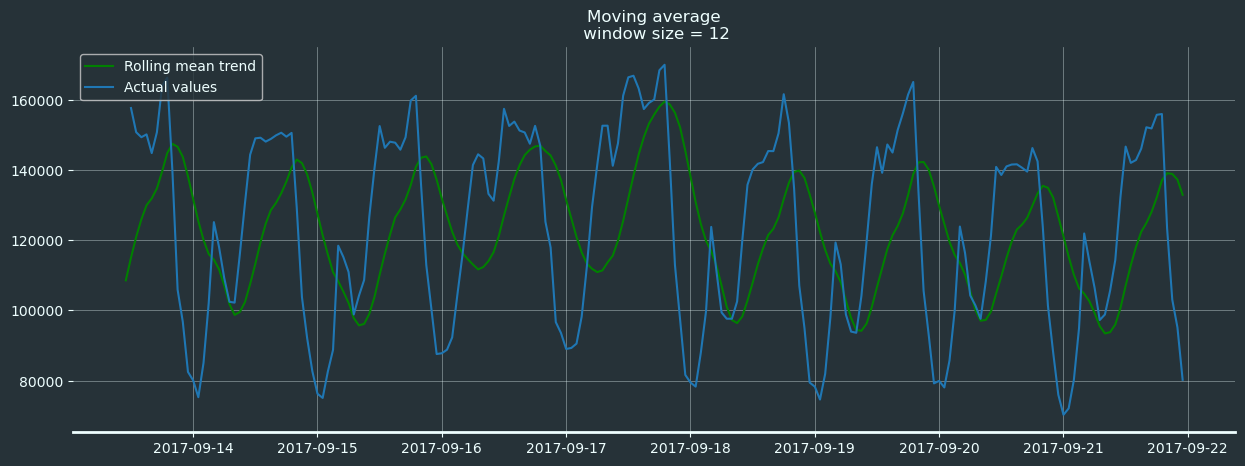

In [16]:
plotMovingAverage(ads, 12)

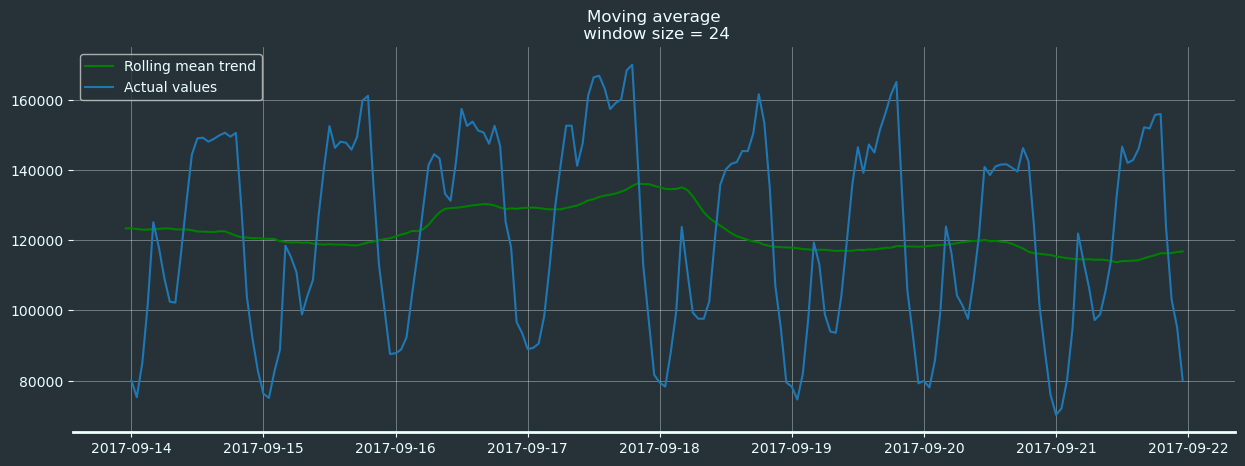

In [17]:
plotMovingAverage(ads, 24)

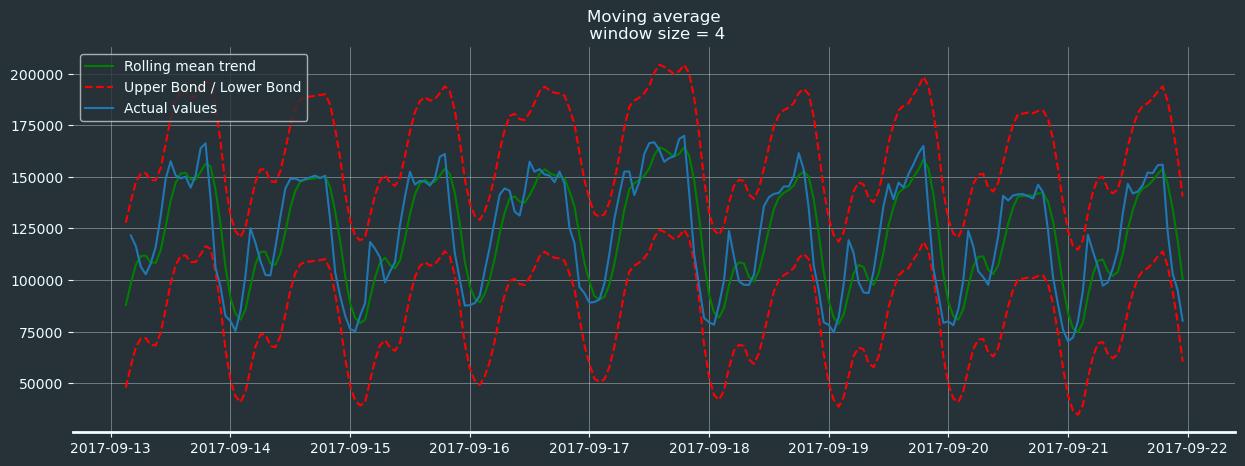

In [18]:
plotMovingAverage(ads, 4, plot_intervals=True)

Now, let’s create a simple anomaly detection system with the help of moving average. Unfortunately, in this particular dataset, everything is more or less normal, so we will intentionally make one of the values abnormal in our dataframe `ads_anomaly`.

In [19]:
ads_anomaly = ads.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2  # say we have 80% drop of ads

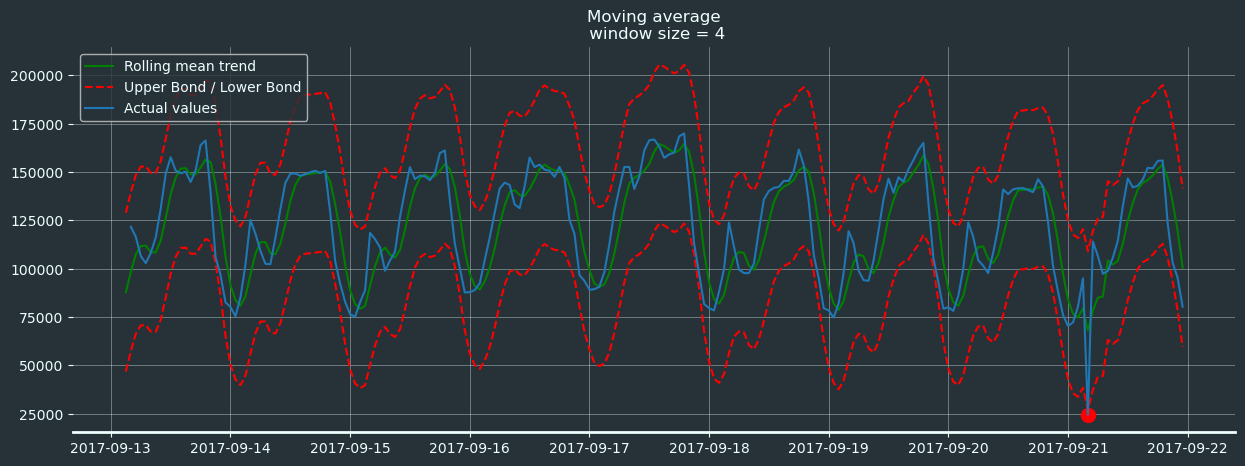

In [20]:
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

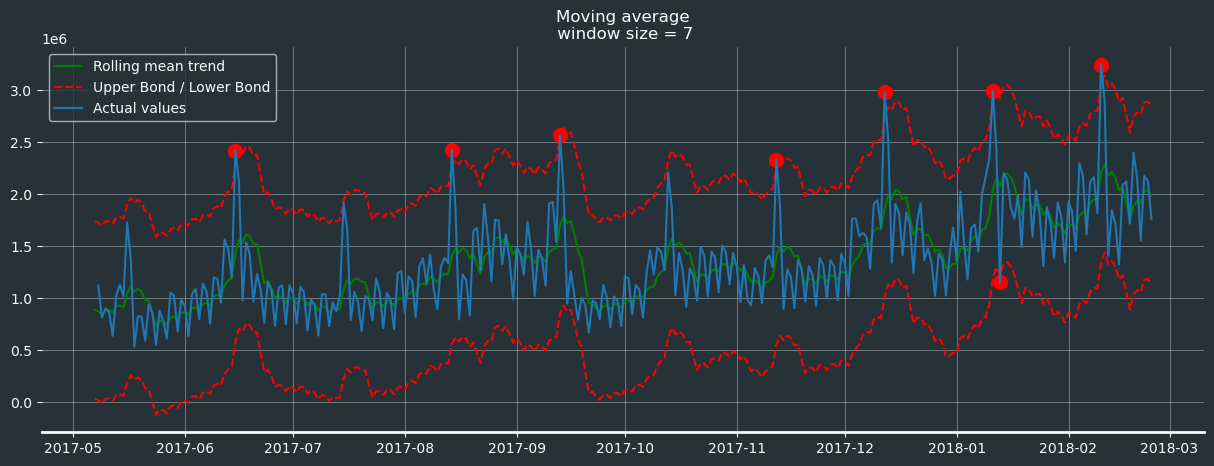

In [21]:
plotMovingAverage(
    currency, 7, plot_intervals=True, plot_anomalies=True
)  # weekly smoothing

Here, we can see the downside of our simple approach – it did not capture the monthly seasonality in our data and marked almost all 30-day peaks as anomalies. If you want to avoid false positives, it is best to consider more complex models.

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

In [22]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n - 1] * weights[n]
    return float(result.iloc[0])

In [23]:
weighted_average(ads, [0.6, 0.3, 0.1])

87025.5

## Exponential smoothing

Now, let’s see what happens if, instead of weighting the last values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for exponential smoothing that will help us with this:

$$
    \hat{y}_t = \alpha\times y_t + (1 - \alpha)\times \hat{y}_{t-1}
$$

Here the model value is a weighted average between the current true value and the previous model values. The weight is called a smoothing factor. It defines how quickly we will “forget” the last available true observation. The smaller 
 is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function – we multiply by 
 each time, which already contains a multiplication by 
 of previous model values.



In [24]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """

    result = [series.iloc[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series.iloc[n] + (1 - alpha) * result[n - 1])
        
    return result

In [25]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    #with plt.style.context("bmh"):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
        plt.plot(
            exponential_smoothing(series, alpha), label="Alpha {}".format(alpha)
        )
    plt.plot(series.values, "c", label="Actual")
    plt.legend(loc="best")
    plt.axis("tight")
    plt.title("Exponential Smoothing")
    plt.grid(True);

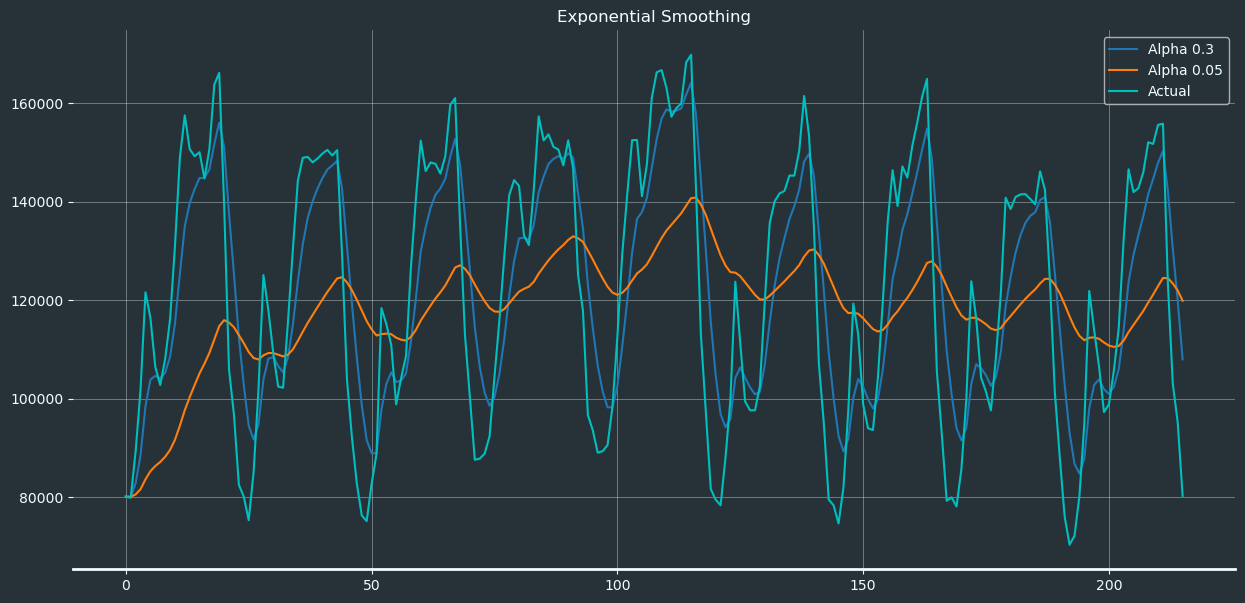

In [26]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])

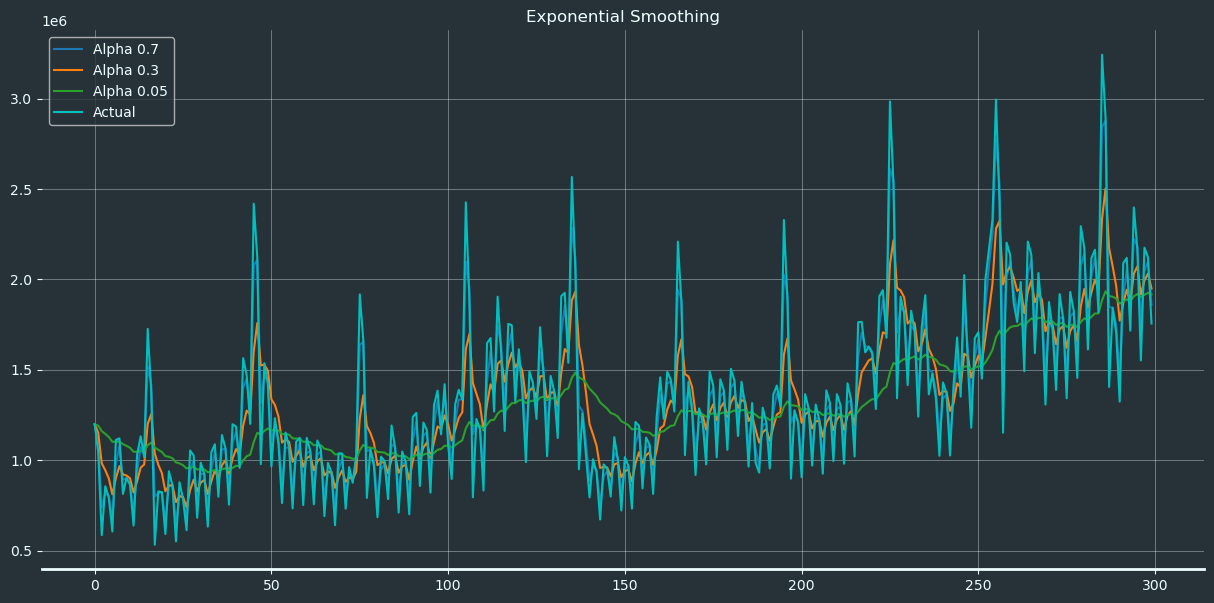

In [27]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.7, 0.3, 0.05])

### Double exponential smoothing

Up to now, the methods that we’ve discussed have been for a single future point prediction (with some nice smoothing). That is cool, but it is also not enough. Let’s extend exponential smoothing so that we can predict two future points (of course, we will also include more smoothing).

Series decomposition will help us – we obtain two components: intercept (i.e. level) and slope (i.e. trend). We have learnt to predict intercept (or expected series value) with our previous methods; now, we will apply the same exponential smoothing to the trend by assuming that the future direction of the time series changes depends on the previous weighted changes. 

In [28]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series.iloc[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series.iloc[0], series.iloc[1] - series.iloc[0]
        if n >= len(series):  # forecasting
            value = result[-1]
        else:
            value = series.iloc[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result


def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """

    #with plt.style.context("bmh"):
    plt.figure(figsize=(20, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(
                double_exponential_smoothing(series, alpha, beta),
                label="Alpha {}, beta {}".format(alpha, beta),
            )
    plt.plot(series.values, label="Actual")
    plt.legend(loc="best")
    plt.axis("tight")
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

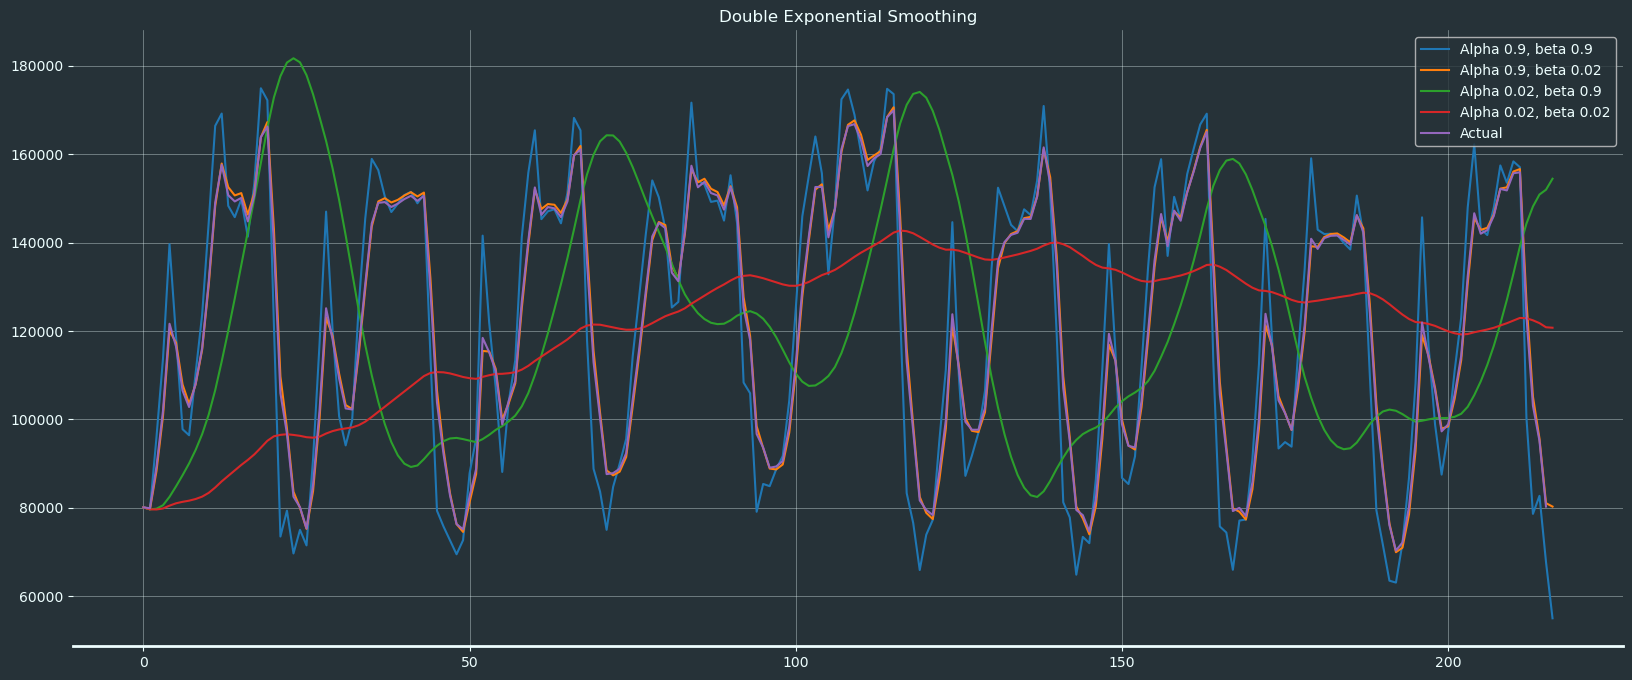

In [29]:
plotDoubleExponentialSmoothing(ads.Ads, alphas=[0.9, 0.02], betas=[0.9, 0.02])

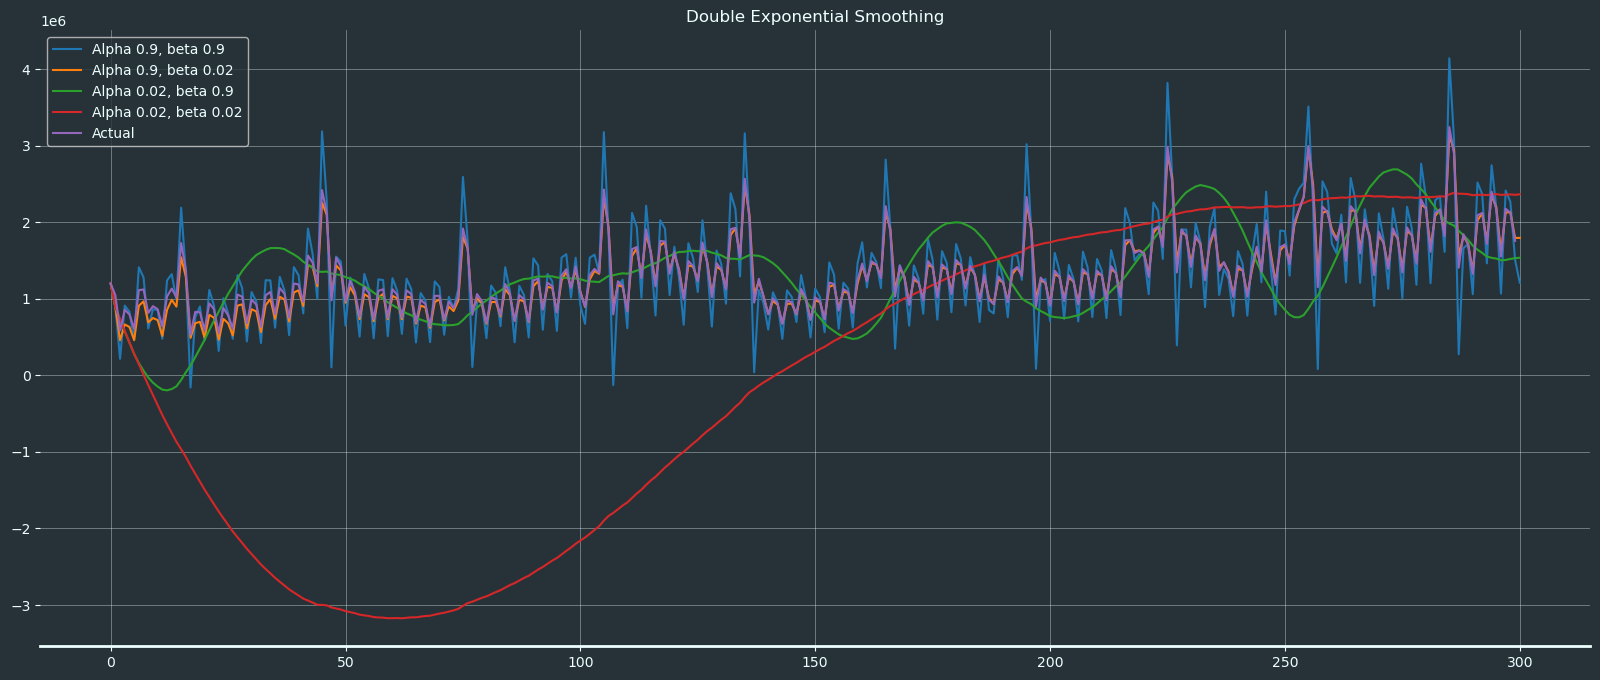

In [30]:
plotDoubleExponentialSmoothing(
    currency.GEMS_GEMS_SPENT,
    alphas=[0.9, 0.02],
    betas=[0.9, 0.02]
)

Now we have to tune two parameters: $\alpha$ e $\beta$. The former is responsible for the series smoothing around the trend, the latter for the smoothing of the trend itself. The larger the values, the more weight the most recent observations will have and the less smoothed the model series will be. Certain combinations of the parameters may produce strange results, especially if set manually. We’ll look into choosing parameters automatically in a bit; before that, let’s discuss triple exponential smoothing.

### Triple exponential smoothing a.k.a. Holt-Winters

We’ve looked at exponential smoothing and double exponential smoothing. This time, we’re going into triple exponential smoothing.

As you could have guessed, the idea is to add a third component - seasonality. This means that we should not use this method if our time series is not expected to have seasonality. Seasonal components in the model will explain repeated variations around intercept and trend, and it will be specified by the length of the season, in other words by the period after which the variations repeat. For each observation in the season, there is a separate component; for example, if the length of the season is 7 days (a weekly seasonality), we will have 7 seasonal components, one for each day of the week.

In [31]:
class HoltWinters:

    """
    Holt-Winters model with the anomalies detection using Brutlag method

    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i + self.slen] - self.series[i]) / self.slen
        return sum / self.slen

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series) / self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(
                sum(self.series[self.slen * j : self.slen * j + self.slen])
                / float(self.slen)
            )
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += (
                    self.series[self.slen * j + i] - season_averages[j]
                )
            seasonals[i] = sum_of_vals_over_avg / n_seasons
        return seasonals

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series) + self.n_preds):
            if i == 0:  # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i % self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(
                    self.result[0] + self.scaling_factor * self.PredictedDeviation[0]
                )

                self.LowerBond.append(
                    self.result[0] - self.scaling_factor * self.PredictedDeviation[0]
                )
                continue

            if i >= len(self.series):  # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m * trend) + seasonals[i % self.slen])

                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1] * 1.01)

            else:
                val = self.series[i]
                last_smooth, smooth = (
                    smooth,
                    self.alpha * (val - seasonals[i % self.slen])
                    + (1 - self.alpha) * (smooth + trend),
                )
                trend = self.beta * (smooth - last_smooth) + (1 - self.beta) * trend
                seasonals[i % self.slen] = (
                    self.gamma * (val - smooth)
                    + (1 - self.gamma) * seasonals[i % self.slen]
                )
                self.result.append(smooth + trend + seasonals[i % self.slen])

                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(
                    self.gamma * np.abs(self.series[i] - self.result[i])
                    + (1 - self.gamma) * self.PredictedDeviation[-1]
                )

            self.UpperBond.append(
                self.result[-1] + self.scaling_factor * self.PredictedDeviation[-1]
            )

            self.LowerBond.append(
                self.result[-1] - self.scaling_factor * self.PredictedDeviation[-1]
            )

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

## Time series cross validation

![img](https://mlcourse.ai/_static/img/topic9_time_series_cv.png)

In [32]:
from sklearn.model_selection import TimeSeriesSplit  # you have everything done for you


def timeseriesCVscore(params, series, loss_function=metrics.mean_squared_error, slen=24):
    """
        Returns error on CV  

        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []

    values = series.values
    alpha, beta, gamma = params

    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3)

    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(
            series=values[train],
            slen=slen,
            alpha=alpha,
            beta=beta,
            gamma=gamma,
            n_preds=len(test),
        )
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test) :]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)

    return np.mean(np.array(errors))

In [33]:
%%time
%%capture --no-stdout
data = ads.Ads[:-20]  # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0]

# Minimizing the loss function
opt = minimize(
    timeseriesCVscore,
    x0=x,
    args=(data, metrics.mean_squared_log_error),
    method="TNC",
    bounds=((0, 1), (0, 1), (0, 1)),
)

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(
    data,
    slen=24,
    alpha=alpha_final,
    beta=beta_final,
    gamma=gamma_final,
    n_preds=50,
    scaling_factor=3,
)
model.triple_exponential_smoothing()

0.11679441909042859 0.0026729736895769185 0.060091472931452894
CPU times: user 798 ms, sys: 26.5 ms, total: 825 ms
Wall time: 823 ms


In [34]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies
    """

    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label="Model")
    plt.plot(series.values, label="Actual")
    error = metrics.mean_absolute_percentage_error(series.values, model.result[: len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))

    if plot_anomalies:
        anomalies = np.array([np.nan] * len(series))
        anomalies[series.values < model.LowerBond[: len(series)]] = series.values[
            series.values < model.LowerBond[: len(series)]
        ]
        anomalies[series.values > model.UpperBond[: len(series)]] = series.values[
            series.values > model.UpperBond[: len(series)]
        ]
        plt.plot(anomalies, "o", markersize=10, label="Anomalies")

    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label="Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(
            x=range(0, len(model.result)),
            y1=model.UpperBond,
            y2=model.LowerBond,
            alpha=0.2,
            color="grey",
        )

    plt.vlines(
        len(series),
        ymin=min(model.LowerBond),
        ymax=max(model.UpperBond),
        linestyles="dashed",
    )
    plt.axvspan(len(series) - 20, len(model.result), alpha=0.3, color="lightgrey")
    plt.grid(True)
    plt.axis("tight")
    plt.legend(loc="best", fontsize=13);

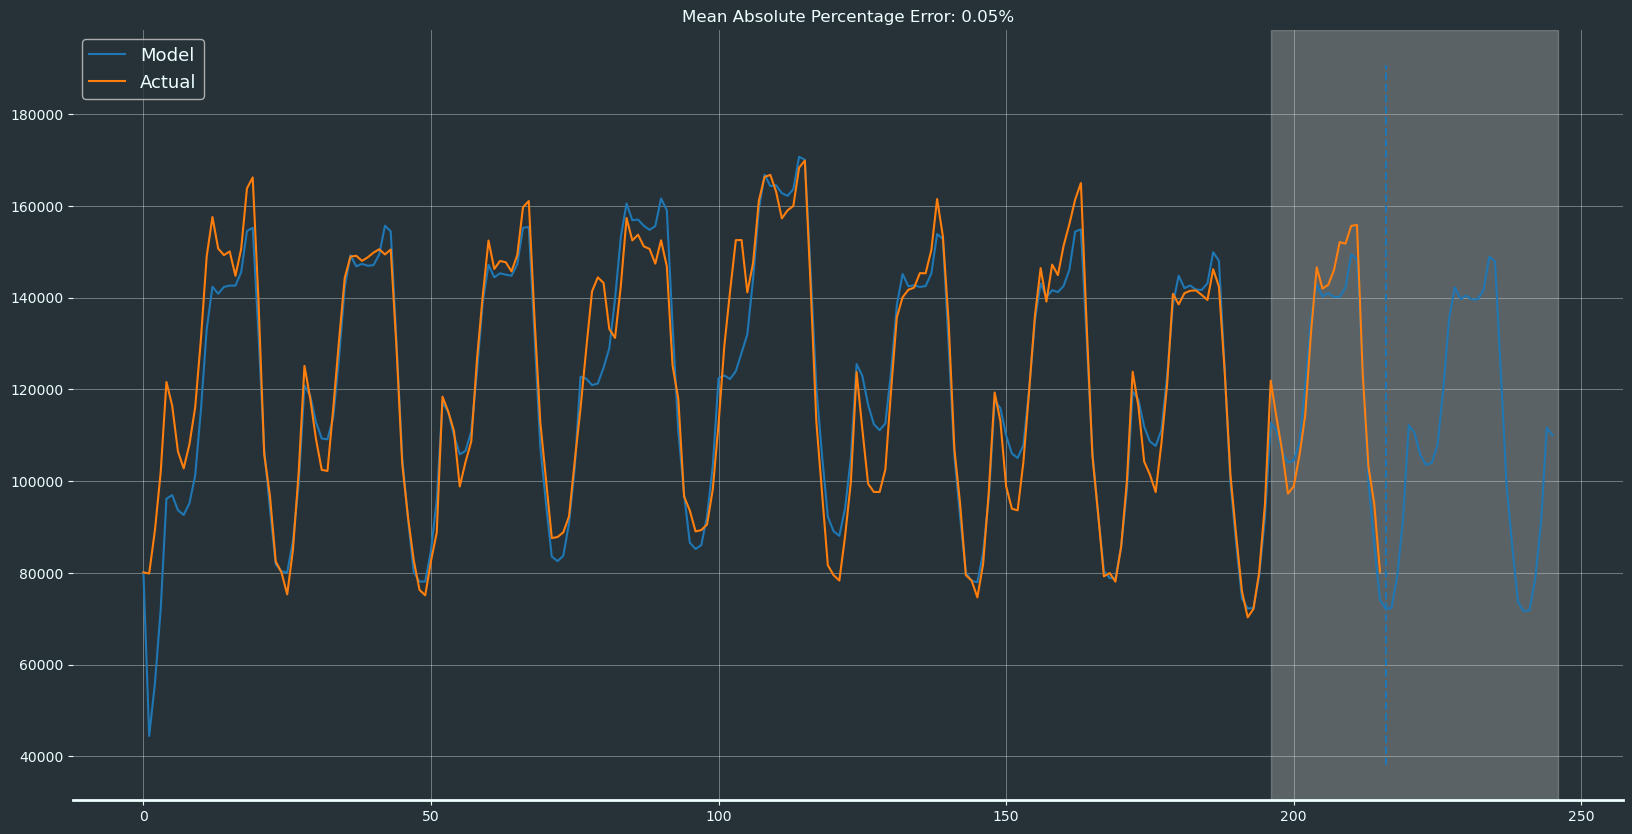

In [35]:
plotHoltWinters(ads.Ads)

Judging by the plots, our model was able to successfully approximate the initial time series, capturing the daily seasonality, overall downwards trend, and even some anomalies. If you look at the model deviations, you can clearly see that the model reacts quite sharply to changes in the structure of the series but then quickly returns the deviation to the normal values, essentially “forgetting” the past.

This feature of the model allows us to quickly build anomaly detection systems, even for noisy series data, without spending too much time and money on preparing the data and training the model.

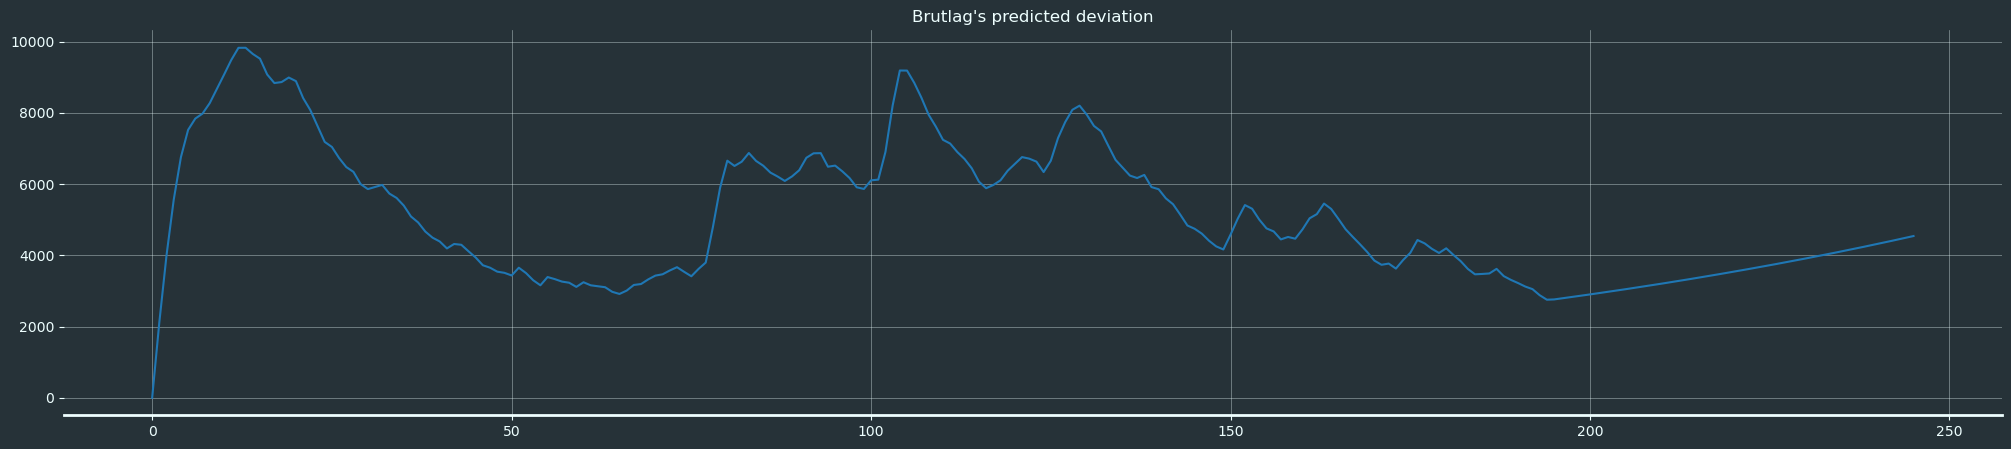

In [36]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis("tight")
plt.title("Brutlag's predicted deviation");

We’ll apply the same algorithm for the second series which, as you may recall, has trend and a 30-day seasonality.

In [37]:
%%time
%%capture --no-stdout
data = currency.GEMS_GEMS_SPENT[:-50]
slen = 30  # 30-day seasonality

x = [0, 0, 0]

opt = minimize(
    timeseriesCVscore,
    x0=x,
    args=(data, metrics.mean_absolute_percentage_error, slen),
    method="TNC",
    bounds=((0, 1), (0, 1), (0, 1)),
)

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

model = HoltWinters(
    data,
    slen=slen,
    alpha=alpha_final,
    beta=beta_final,
    gamma=gamma_final,
    n_preds=100,
    scaling_factor=3,
)
model.triple_exponential_smoothing()

0.013270254679429161 0.04689448914982469 0.0
CPU times: user 1.62 s, sys: 16.2 ms, total: 1.64 s
Wall time: 1.67 s


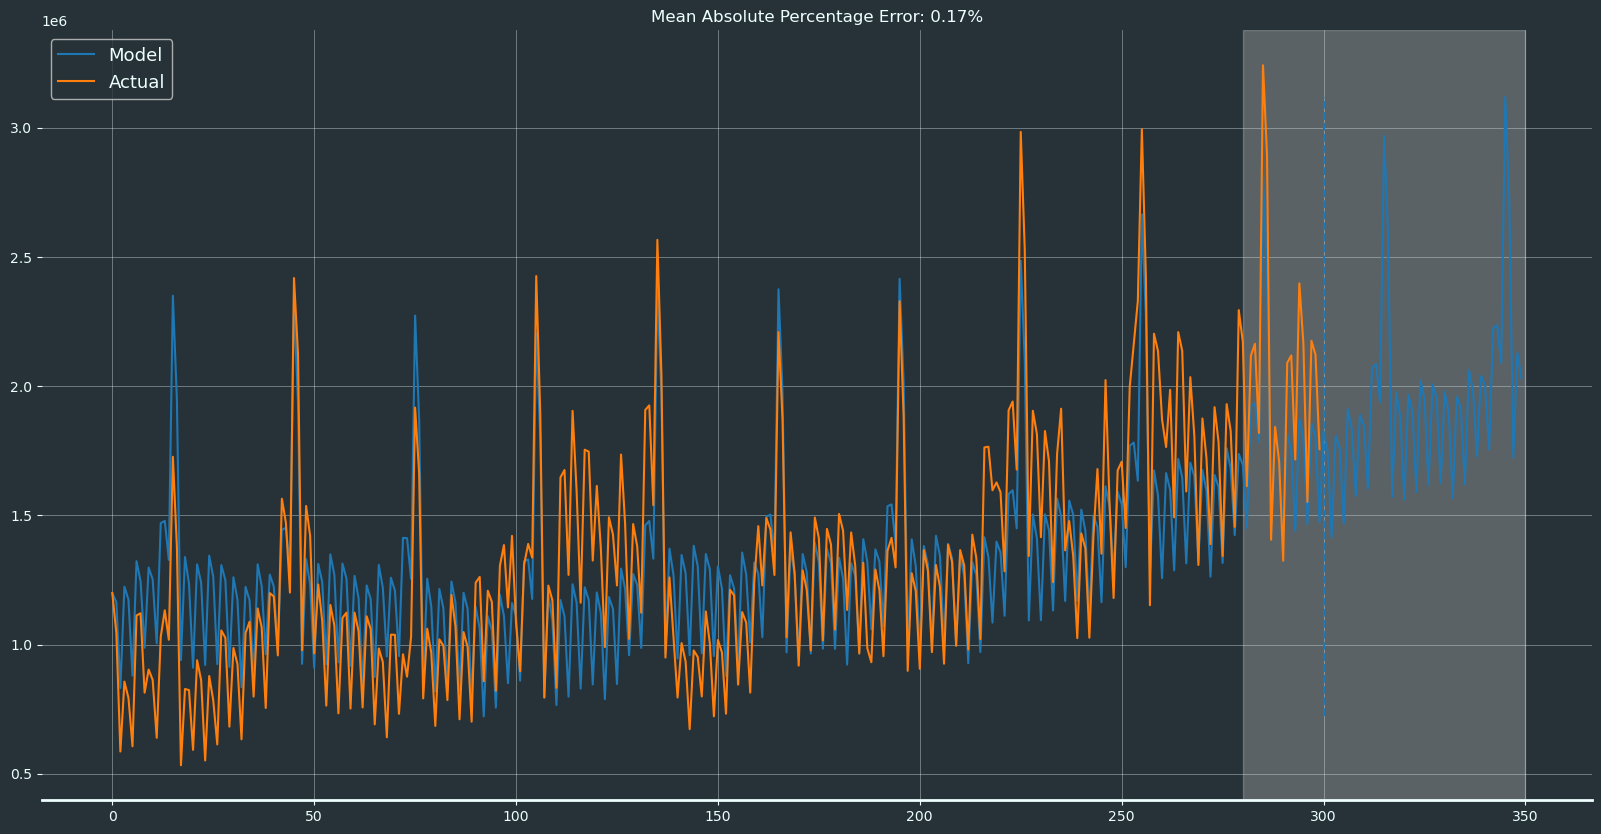

In [38]:
plotHoltWinters(currency.GEMS_GEMS_SPENT)

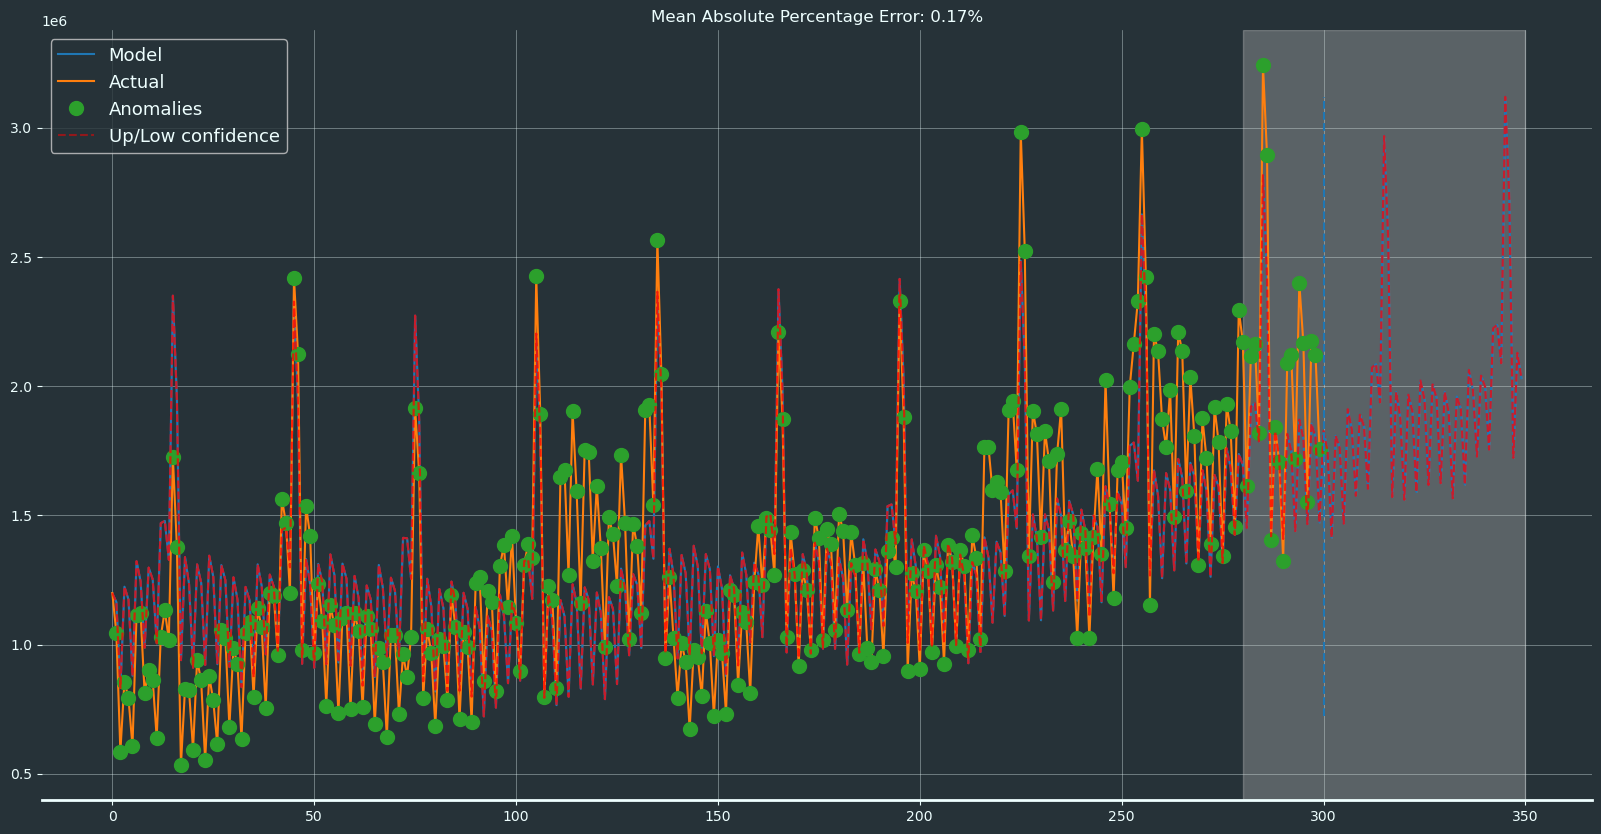

In [39]:
plotHoltWinters(currency.GEMS_GEMS_SPENT, plot_intervals=True, plot_anomalies=True)

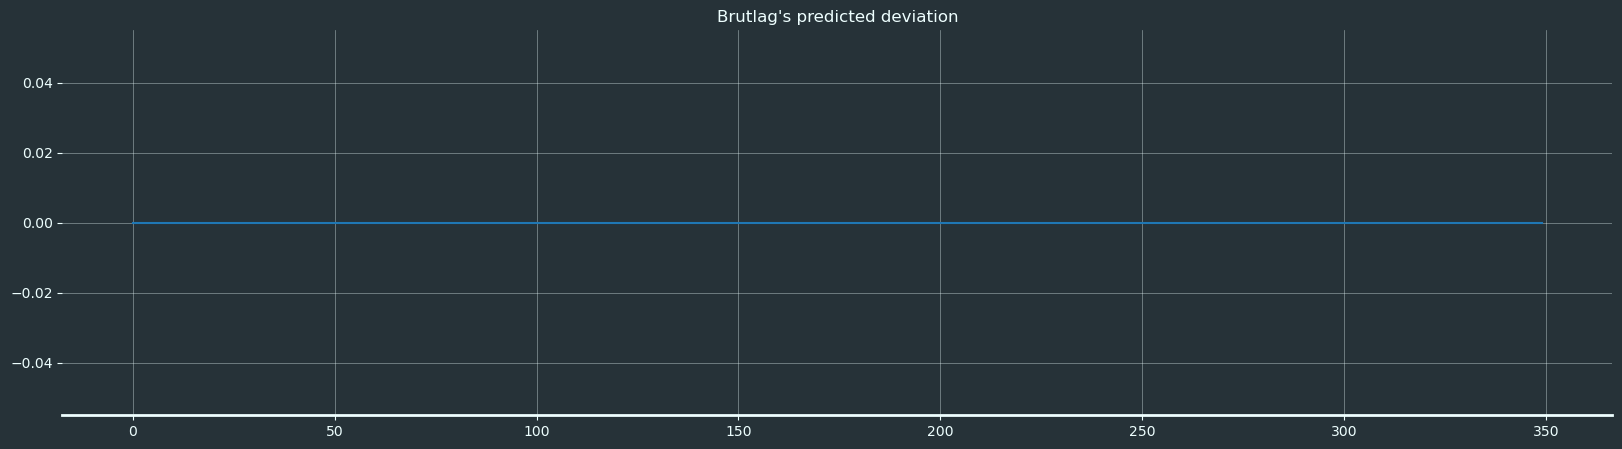

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis("tight")
plt.title("Brutlag's predicted deviation");

## Econometric approach

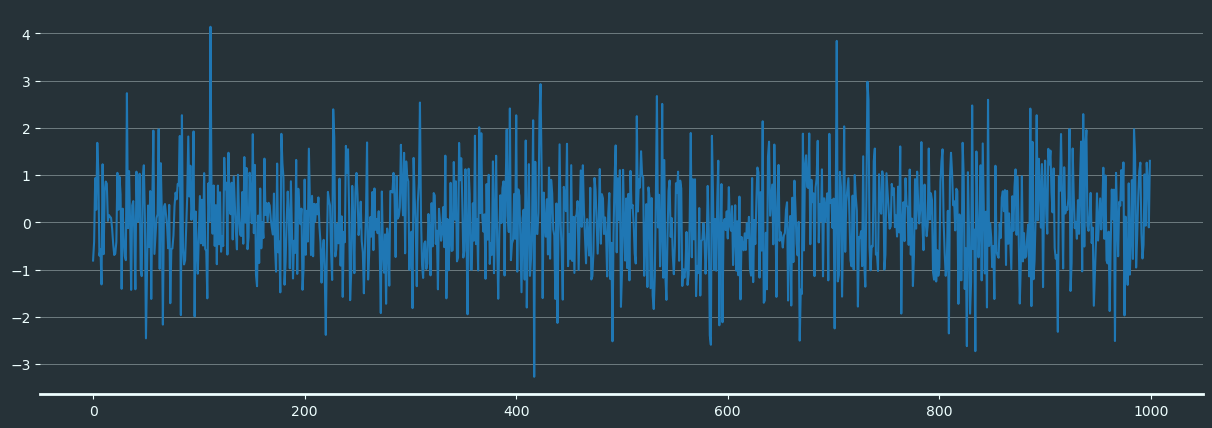

In [41]:
white_noise = np.random.normal(size=1000)
#with plt.style.context("bmh"):
plt.figure(figsize=(15, 5))
plt.plot(white_noise)
plt.show()

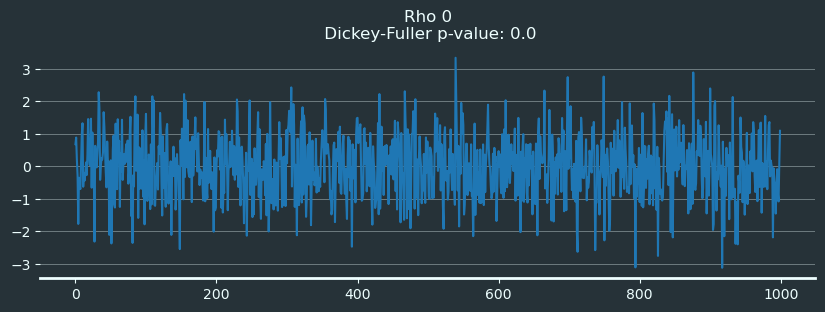

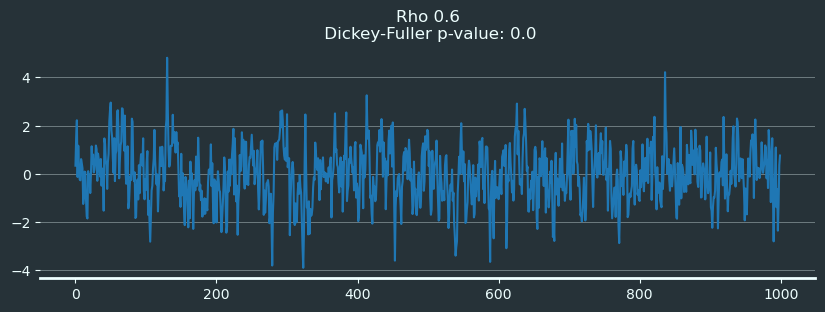

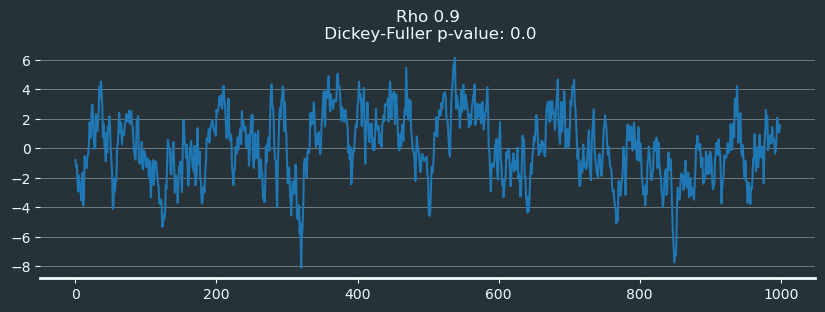

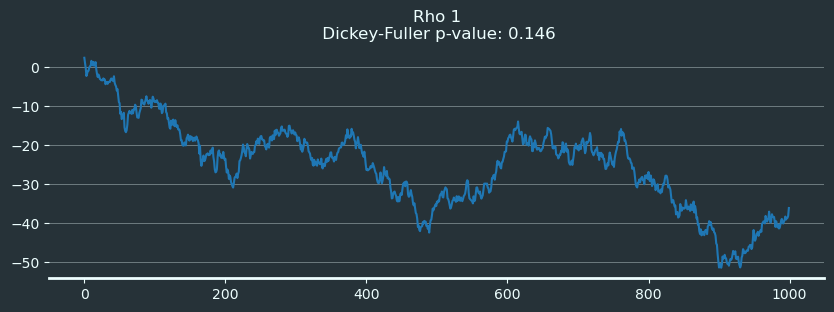

In [42]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t - 1] + w[t]

    #with plt.style.context("bmh"):
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.title(
        f"Rho {rho}\n Dickey-Fuller p-value: {round(sm.tsa.stattools.adfuller(x)[1], 3)}"
    )


for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

### Getting rid of non-stationarity and building SARIMA

In [43]:
def tsplot(y, lags=None, figsize=(12, 7), style="bmh"):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    #with plt.style.context(style):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    ts_ax.plot(y)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title(
        f"Time Series Analysis Plots\n Dickey-Fuller: p={p_value:.5f}"
    )
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

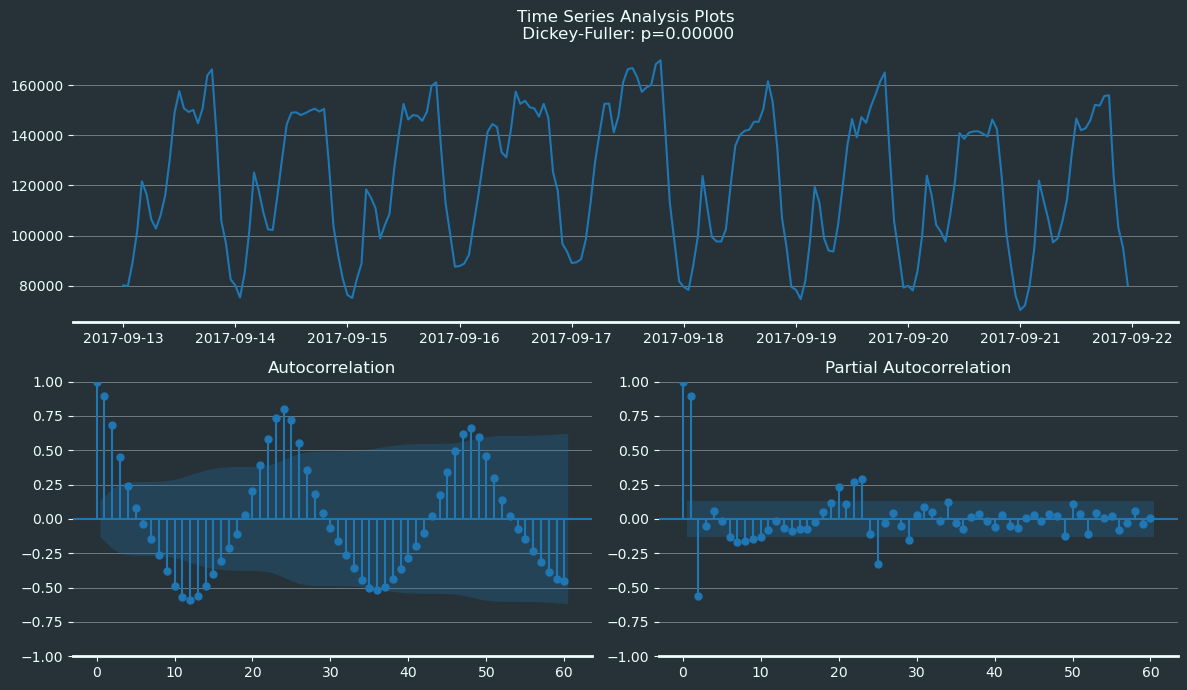

In [44]:
tsplot(ads.Ads, lags=60)

The initial series are stationary; the Dickey-Fuller test rejected the null hypothesis that a unit root is present.

The only thing left is seasonality, which we have to deal with prior to modeling. To do so, let’s take the “seasonal difference”, which means a simple subtraction of the series from itself with a lag that equals the seasonal period.

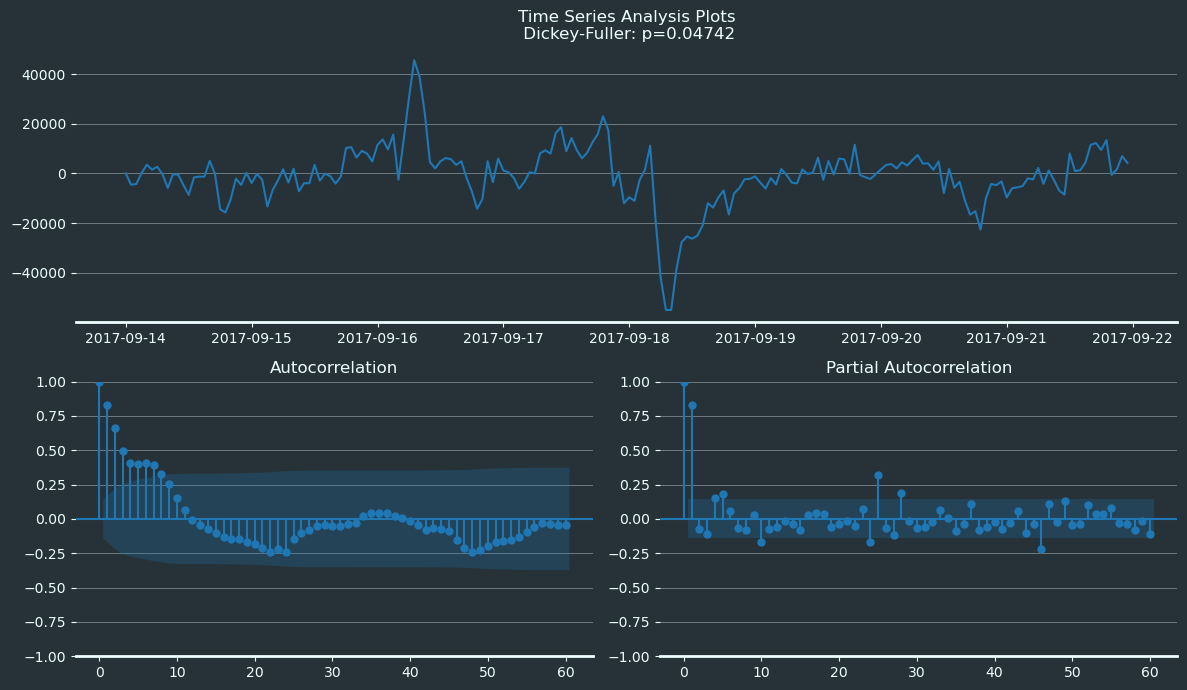

In [45]:
ads_diff = ads.Ads - ads.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)

It is now much better with the visible seasonality gone. However, the autocorrelation function still has too many significant lags. To remove them, we’ll take first differences, subtracting the series from itself with lag 1.

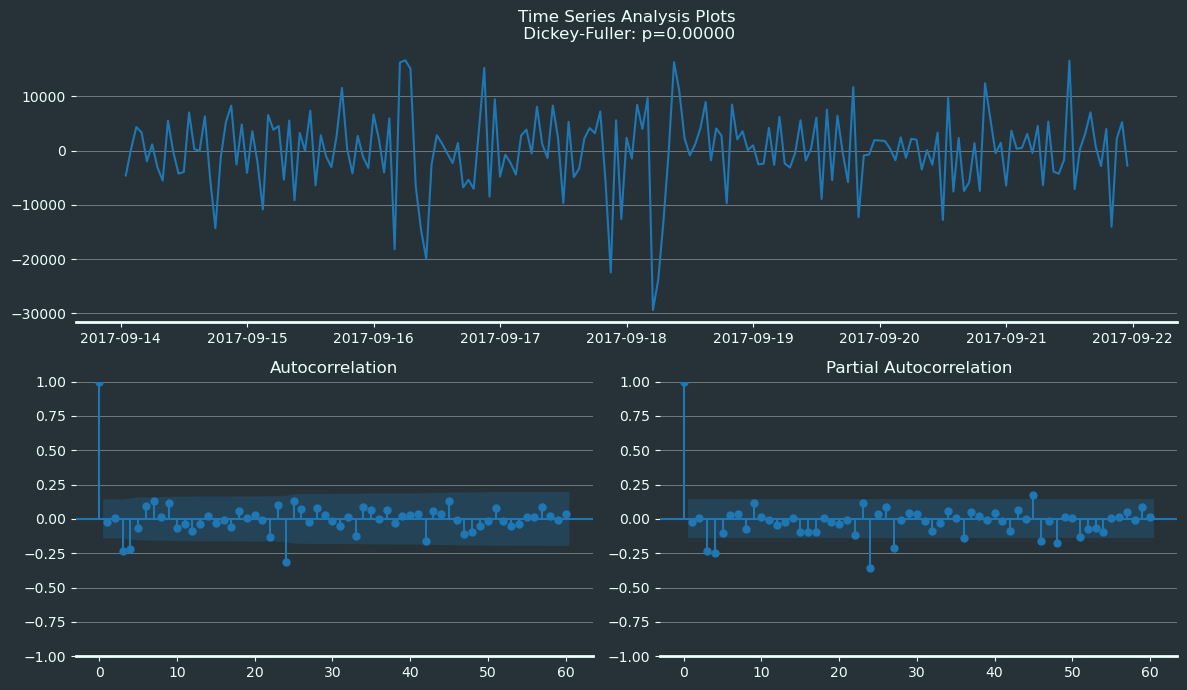

In [46]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24 + 1 :], lags=60)

The series now looks like something indescribable, oscillating around zero. The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped. We can finally start modeling!

### ARIMA-family Crash-Course

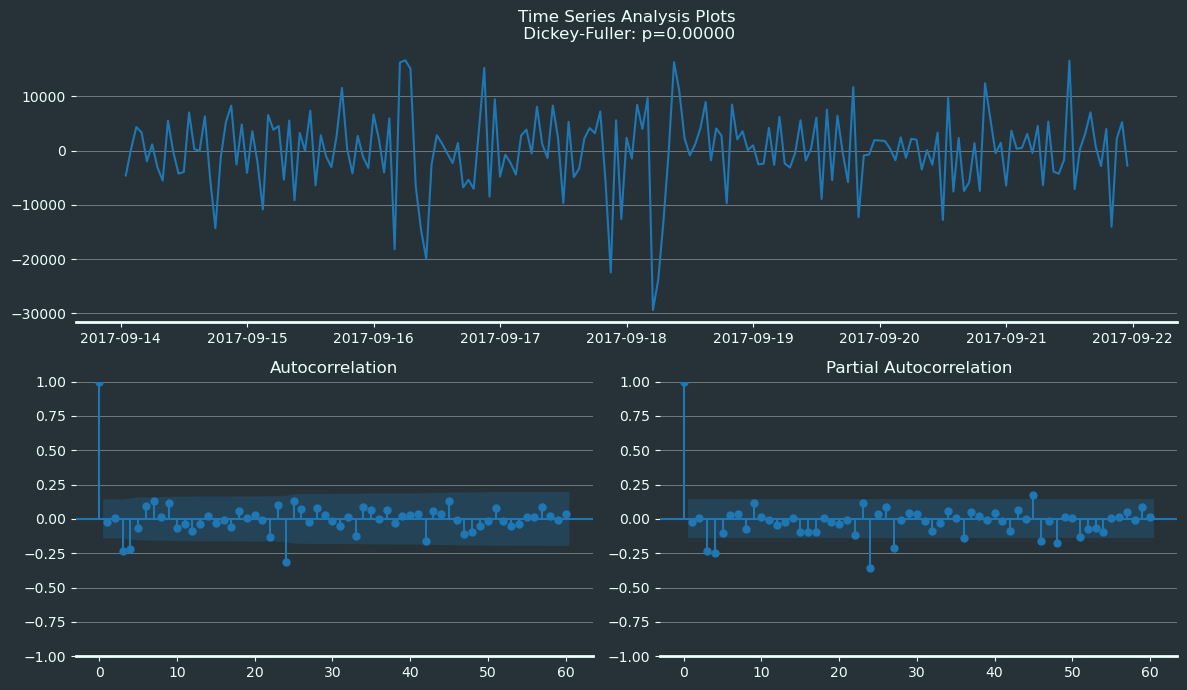

In [47]:
tsplot(ads_diff[24 + 1 :], lags=60)

- $p$ is most probably 4 since it is the last significant lag on the PACF, after which, most others are not significant.
- $d$ equals 1 because we had first differences
- $q$ should be somewhere around 4 as well as seen on the ACF
- $P$ might be 2, since 24-th and 48-th lags are somewhat significant on the PACF
- $D$ again equals 1 because we performed seasonal differentiation
- $Q$ is probably 1. The 24-th lag on ACF is significant while the 48-th is not.

In [48]:
# setting initial values and some bounds for them
ps = range(2, 5)
d = 1
qs = range(2, 5)
Ps = range(0, 2)
D = 1
Qs = range(0, 2)
s = 24  # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [49]:
ads = ads.reset_index()
time_index = pd.to_datetime(ads['Time'].values)
time_index = pd.DatetimeIndex(
    time_index.values,
    time_index.inferred_freq
)
ads['Time'] = pd.DatetimeIndex(
    time_index,
    freq=time_index.inferred_freq
)
ads = ads.set_index('Time', drop=True)

In [50]:
ads

Ads
Time                       
2017-09-13 00:00:00   80115
2017-09-13 01:00:00   79885
2017-09-13 02:00:00   89325
2017-09-13 03:00:00  101930
2017-09-13 04:00:00  121630
...                     ...
2017-09-21 19:00:00  155890
2017-09-21 20:00:00  123395
2017-09-21 21:00:00  103080
2017-09-21 22:00:00   95155
2017-09-21 23:00:00   80285

[216 rows x 1 columns]

In [51]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order
        s - length of season
    """

    results = []
    best_aic = float("inf")

    for param in tqdm(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model = sm.tsa.statespace.SARIMAX(
                ads.Ads,
                order=(param[0], d, param[1]),
                seasonal_order=(param[2], D, param[3], s),
                freq='h'
            ).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ["parameters", "aic"]
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by="aic", ascending=True).reset_index(
        drop=True
    )

    return result_table

In [52]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

  0%|          | 0/36 [00:00<?, ?it/s]

/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.p

CPU times: user 23min 10s, sys: 6.8 s, total: 23min 17s
Wall time: 3min 53s


In [53]:
result_table.head()

parameters          aic
0  (2, 3, 1, 1)  3888.642174
1  (3, 2, 1, 1)  3888.763568
2  (4, 2, 1, 1)  3890.279740
3  (3, 3, 1, 1)  3890.513196
4  (2, 4, 1, 1)  3892.302849

In [54]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(
    ads.Ads, order=(p, d, q), seasonal_order=(P, D, Q, s)
).fit(disp=-1)
print(best_model.summary())

/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/diego/miniconda3/envs/ds-min/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                  Ads   No. Observations:                  216
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 24)   Log Likelihood               -1936.321
Date:                              Fri, 05 Jul 2024   AIC                           3888.642
Time:                                      14:04:43   BIC                           3914.660
Sample:                                  09-13-2017   HQIC                          3899.181
                                       - 09-21-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7913      0.270      2.928      0.003       0.262       1.321
ar.L2         -0.55

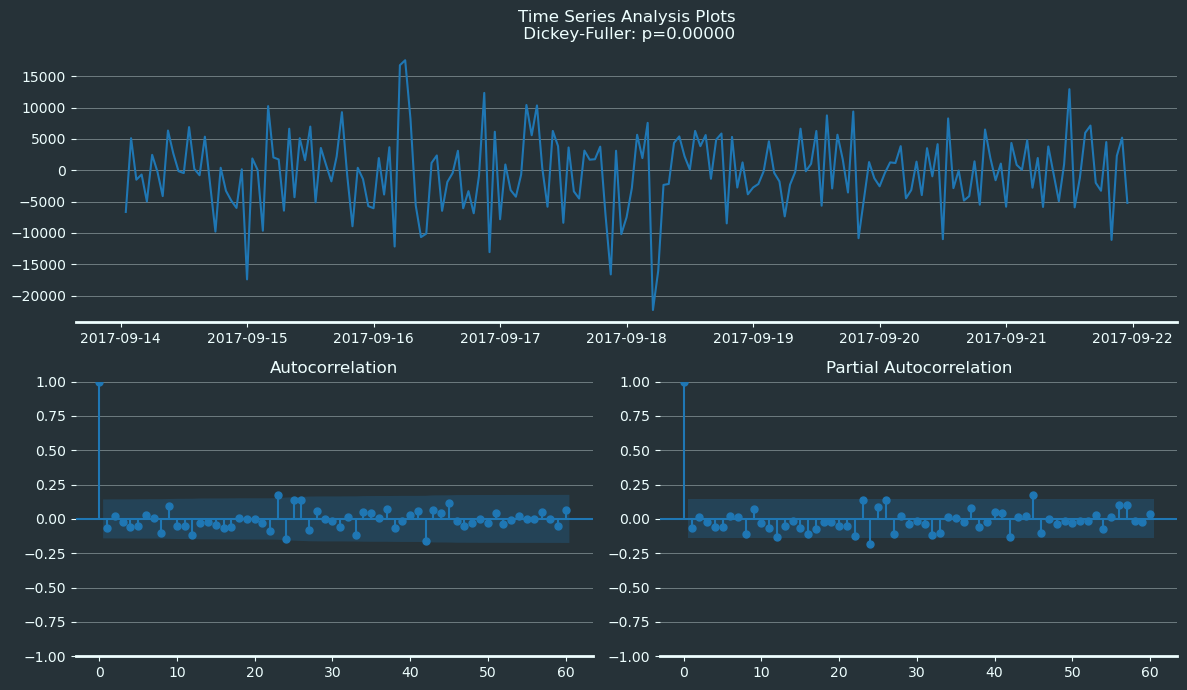

In [55]:
tsplot(best_model.resid[24 + 1 :], lags=60)

It is clear that the residuals are stationary, and there are no apparent autocorrelations. Let’s make predictions using our model.

In [56]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ["actual"]
    data["arima_model"] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    #data["arima_model"].iloc[: s + d] = np.nan
    data.iloc[: s + d] = np.nan

    # forecasting on n_steps forward
    forecast = model.predict(start=data.shape[0], end=data.shape[0] + n_steps)
    forecast = data.arima_model._append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = metrics.mean_absolute_percentage_error(
        data["actual"][s + d :], data["arima_model"][s + d :]
    )

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color="r", label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color="lightgrey")
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

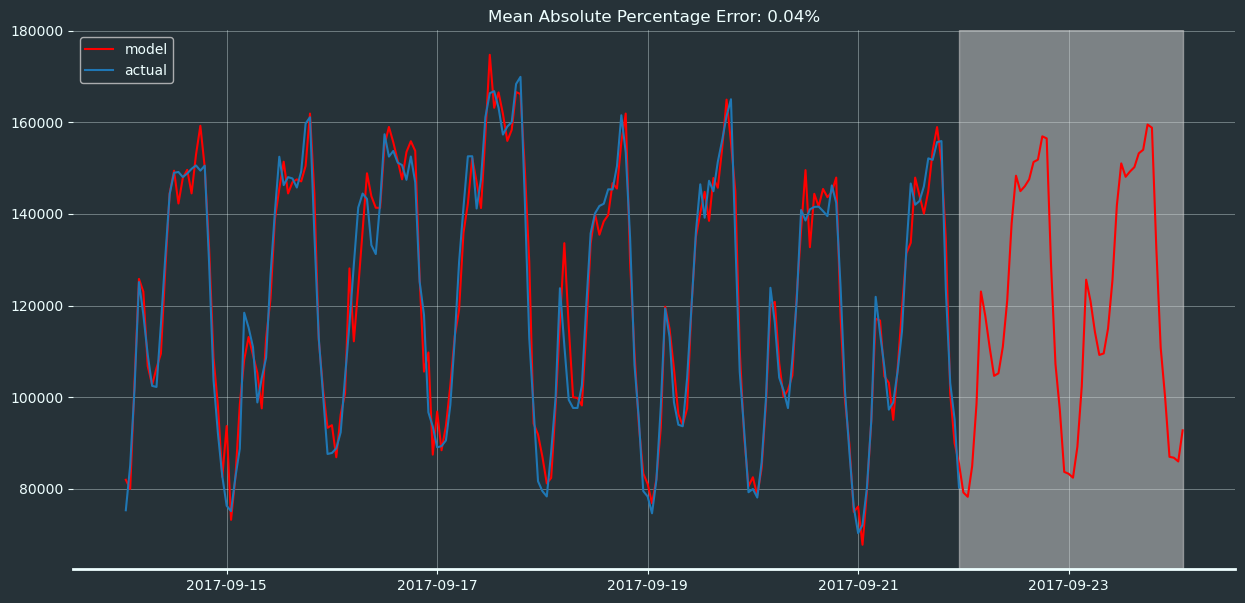

In [57]:
plotSARIMA(ads, best_model, 50)

## Linear (and not only) models for time series

### Feature extraction

### Time series lags

In [58]:
# Creating a copy of the initial datagrame to make various transformations
data = pd.DataFrame(ads.Ads.copy())
data.columns = ["y"]

In [59]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [60]:
# take a look at the new dataframe
data.tail(7)

y     lag_6     lag_7     lag_8     lag_9    lag_10  \
Time                                                                            
2017-09-21 17:00:00  151790  132335.0  114380.0  105635.0   98860.0   97290.0   
2017-09-21 18:00:00  155665  146630.0  132335.0  114380.0  105635.0   98860.0   
2017-09-21 19:00:00  155890  141995.0  146630.0  132335.0  114380.0  105635.0   
2017-09-21 20:00:00  123395  142815.0  141995.0  146630.0  132335.0  114380.0   
2017-09-21 21:00:00  103080  146020.0  142815.0  141995.0  146630.0  132335.0   
2017-09-21 22:00:00   95155  152120.0  146020.0  142815.0  141995.0  146630.0   
2017-09-21 23:00:00   80285  151790.0  152120.0  146020.0  142815.0  141995.0   

                       lag_11    lag_12    lag_13    lag_14    lag_15  \
Time                                                                    
2017-09-21 17:00:00  106495.0  113950.0  121910.0   94945.0   80195.0   
2017-09-21 18:00:00   97290.0  106495.0  113950.0  121910.0   94945.0   
2017-09-21 19:00:00   98860.0   97290.0  106495.0  113950.0  121910.0   
2017-09-21 20:00:00  105635.0   98860.0   97290.0  106495.0  113950.0   
2017-09-21 21:00:00  114380.0  105635.0   98860.0   97290.0  106495.0   
2017-09-21 22:00:00  132335.0  114380.0  105635.0   98860.0   97290.0   
2017-09-21 23:00:00  146630.0  132335.0  114380.0  105635.0   98860.0   

                       lag_16    lag_17    lag_18    lag_19    lag_20  \
Time                                                                    
2017-09-21 17:00:00   72150.0   70335.0   76050.0   88170.0  101360.0   
2017-09-21 18:00:00   80195.0   72150.0   70335.0   76050.0   88170.0   
2017-09-21 19:00:00   94945.0   80195.0   72150.0   70335.0   76050.0   
2017-09-21 20:00:00  121910.0   94945.0   80195.0   72150.0   70335.0   
2017-09-21 21:00:00  113950.0  121910.0   94945.0   80195.0   72150.0   
2017-09-21 22:00:00  106495.0  113950.0  121910.0   94945.0   80195.0   
2017-09-21 23:00:00   97290.0  106495.0  113950.0  121910.0   94945.0   

                       lag_21    lag_22    lag_23    lag_24  
Time                                                         
2017-09-21 17:00:00  123945.0  142425.0  146215.0  139515.0  
2017-09-21 18:00:00  101360.0  123945.0  142425.0  146215.0  
2017-09-21 19:00:00   88170.0  101360.0  123945.0  142425.0  
2017-09-21 20:00:00   76050.0   88170.0  101360.0  123945.0  
2017-09-21 21:00:00   70335.0   76050.0   88170.0  101360.0  
2017-09-21 22:00:00   72150.0   70335.0   76050.0   88170.0  
2017-09-21 23:00:00   80195.0   72150.0   70335.0   76050.0

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds
tscv = TimeSeriesSplit(n_splits=5)

In [62]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """

    # get the index after which test set starts
    test_index = int(len(X) * (1 - test_size))

    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [63]:
y = data.dropna().y
X = data.dropna().drop(["y"], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [64]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
def plotModelResults(
    model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False
):
    """
        Plots modelled vs fact values, prediction intervals and anomalies

    """

    prediction = model.predict(X_test)

    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)

    if plot_intervals:
        cv = cross_val_score(
            model, X_train, y_train, cv=tscv, scoring="neg_mean_absolute_error"
        )
        mae = cv.mean() * (-1)
        deviation = cv.std()

        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)

        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)

        if plot_anomalies:
            anomalies = np.array([np.nan] * len(y_test))
            anomalies[y_test < lower] = y_test[y_test < lower]
            anomalies[y_test > upper] = y_test[y_test > upper]
            plt.plot(anomalies, "o", markersize=10, label="Anomalies")

    error = metrics.mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)


def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind="bar")
    plt.grid(True, axis="y")
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles="dashed");

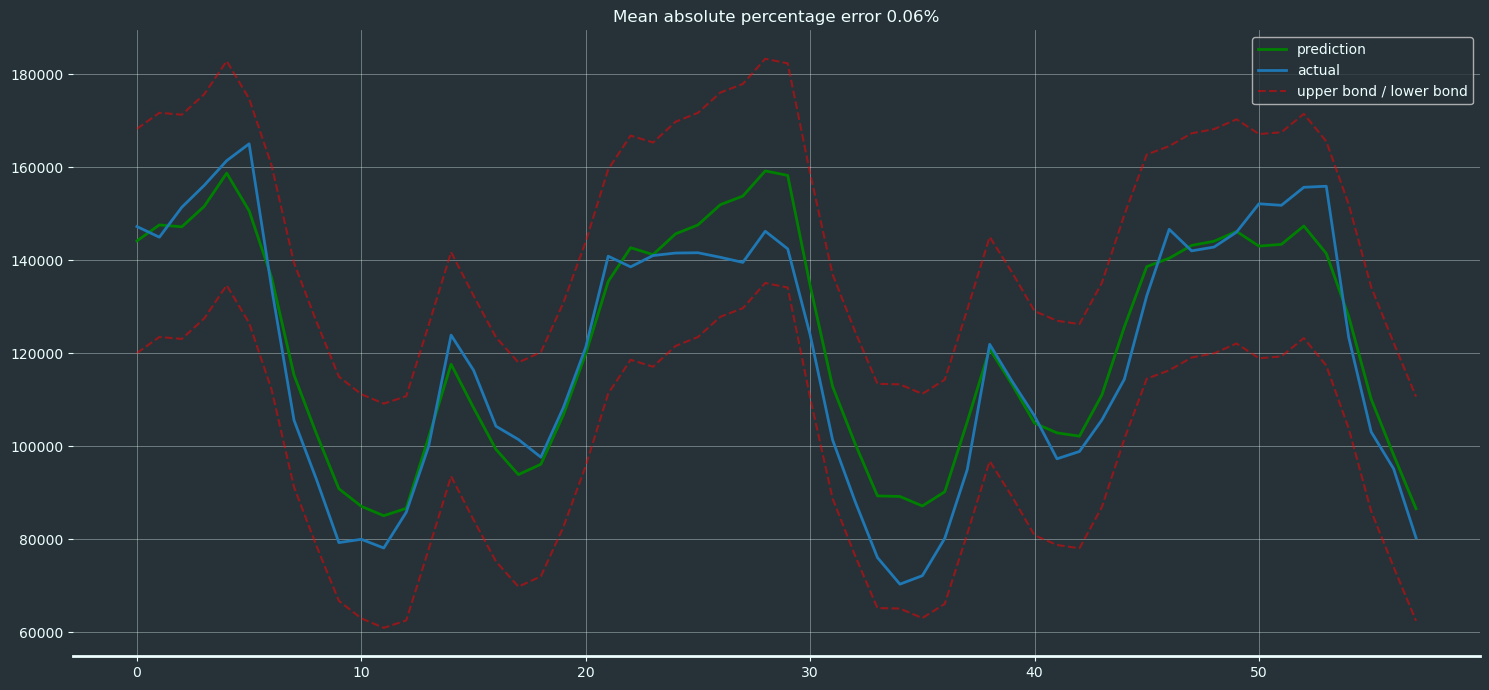

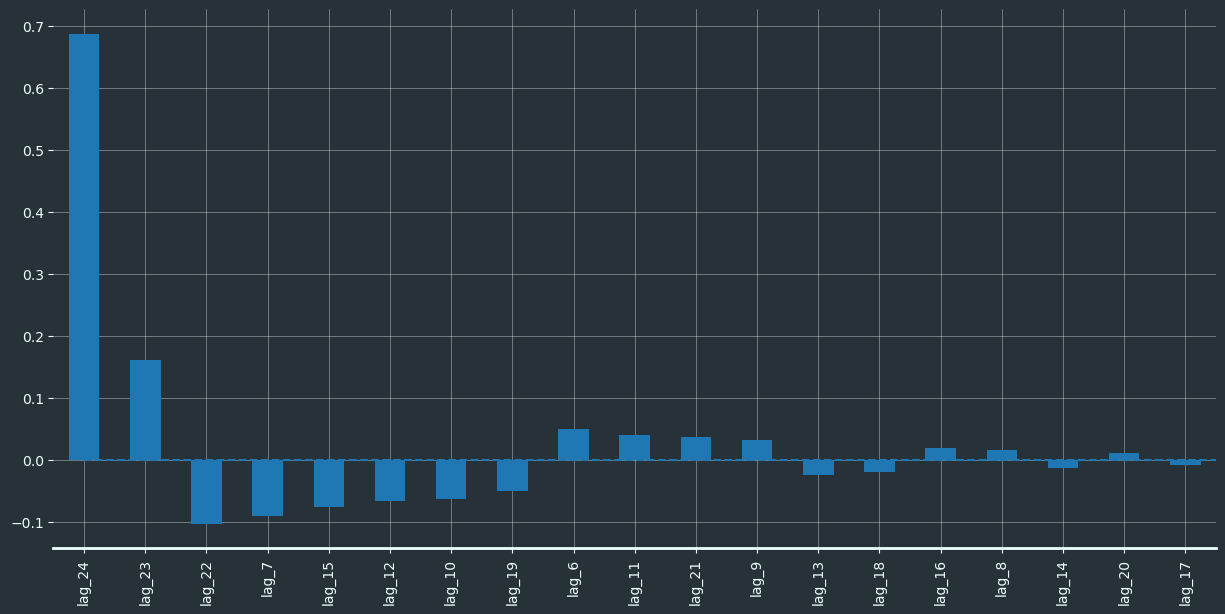

In [66]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [69]:
#data.index = pd.to_datetime(data.index)
data["hour"] = data.index.hour
data["weekday"] = data.index.dayofweek
data["is_weekend"] = data.weekday.isin([5, 6]) * 1
data.tail()

y     lag_6     lag_7     lag_8     lag_9    lag_10  \
Time                                                                            
2017-09-21 19:00:00  155890  141995.0  146630.0  132335.0  114380.0  105635.0   
2017-09-21 20:00:00  123395  142815.0  141995.0  146630.0  132335.0  114380.0   
2017-09-21 21:00:00  103080  146020.0  142815.0  141995.0  146630.0  132335.0   
2017-09-21 22:00:00   95155  152120.0  146020.0  142815.0  141995.0  146630.0   
2017-09-21 23:00:00   80285  151790.0  152120.0  146020.0  142815.0  141995.0   

                       lag_11    lag_12    lag_13    lag_14  ...    lag_18  \
Time                                                         ...             
2017-09-21 19:00:00   98860.0   97290.0  106495.0  113950.0  ...   72150.0   
2017-09-21 20:00:00  105635.0   98860.0   97290.0  106495.0  ...   80195.0   
2017-09-21 21:00:00  114380.0  105635.0   98860.0   97290.0  ...   94945.0   
2017-09-21 22:00:00  132335.0  114380.0  105635.0   98860.0  ...  121910.0   
2017-09-21 23:00:00  146630.0  132335.0  114380.0  105635.0  ...  113950.0   

                       lag_19   lag_20   lag_21    lag_22    lag_23    lag_24  \
Time                                                                            
2017-09-21 19:00:00   70335.0  76050.0  88170.0  101360.0  123945.0  142425.0   
2017-09-21 20:00:00   72150.0  70335.0  76050.0   88170.0  101360.0  123945.0   
2017-09-21 21:00:00   80195.0  72150.0  70335.0   76050.0   88170.0  101360.0   
2017-09-21 22:00:00   94945.0  80195.0  72150.0   70335.0   76050.0   88170.0   
2017-09-21 23:00:00  121910.0  94945.0  80195.0   72150.0   70335.0   76050.0   

                     hour  weekday  is_weekend  
Time                                            
2017-09-21 19:00:00    19        3           0  
2017-09-21 20:00:00    20        3           0  
2017-09-21 21:00:00    21        3           0  
2017-09-21 22:00:00    22        3           0  
2017-09-21 23:00:00    23        3           0  

[5 rows x 23 columns]

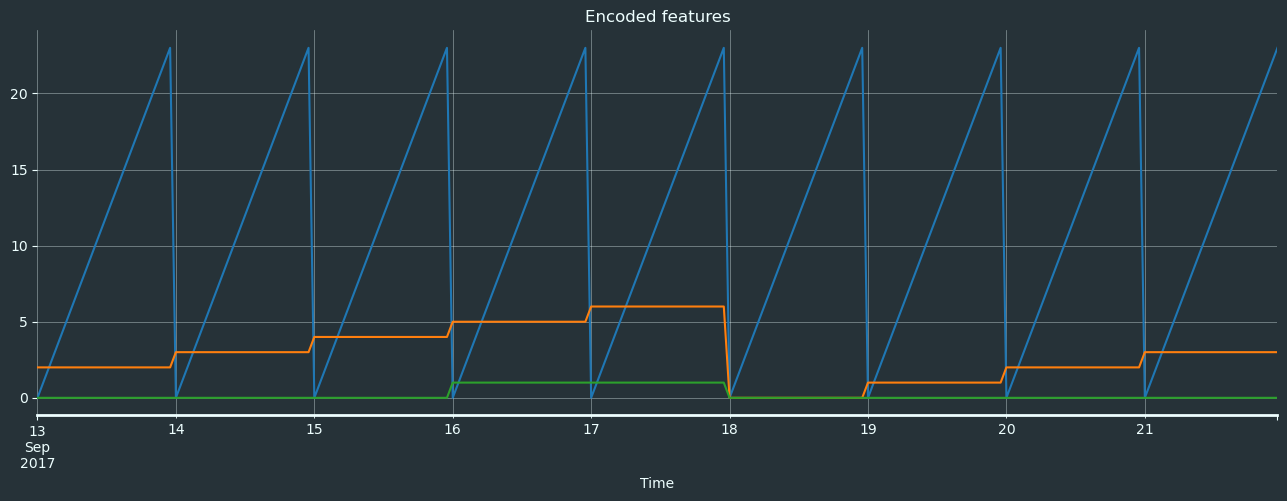

In [70]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.hour.plot()
data.weekday.plot()
data.is_weekend.plot()
plt.grid(True);

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

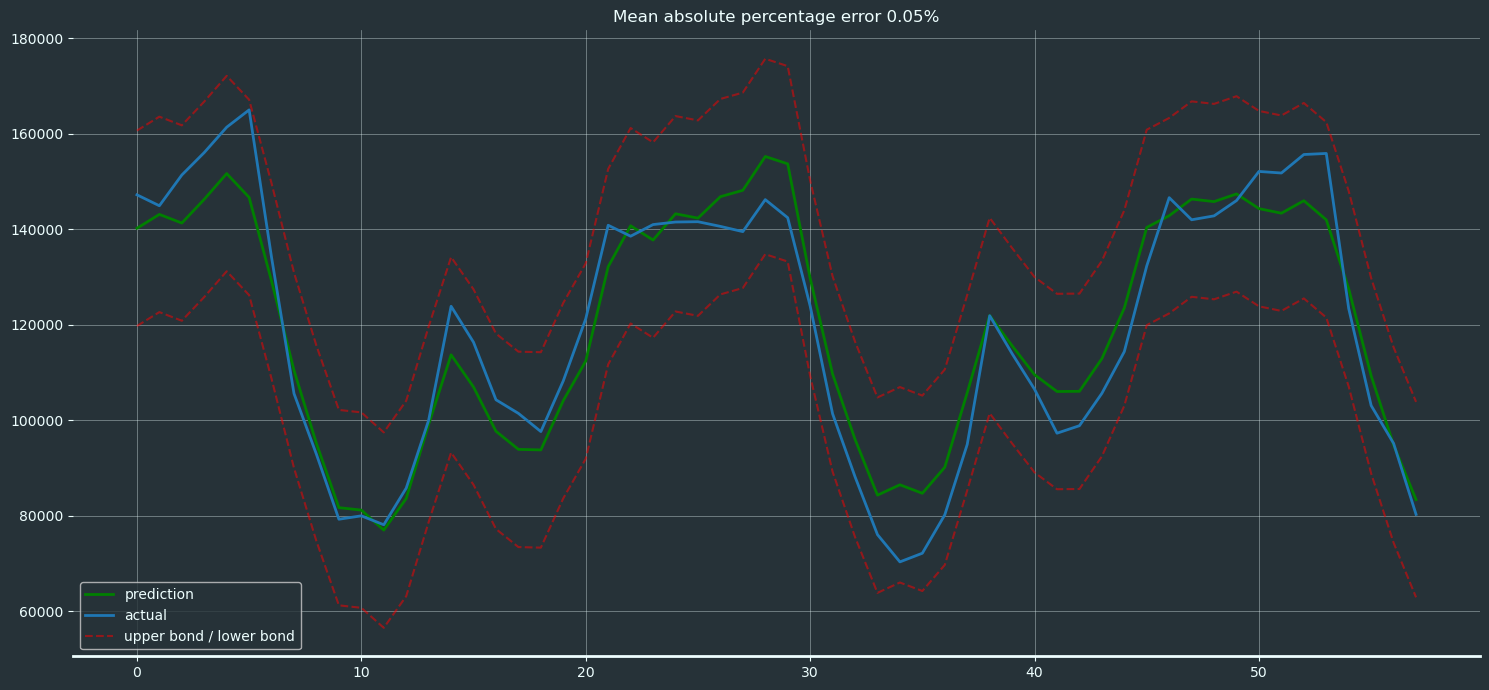

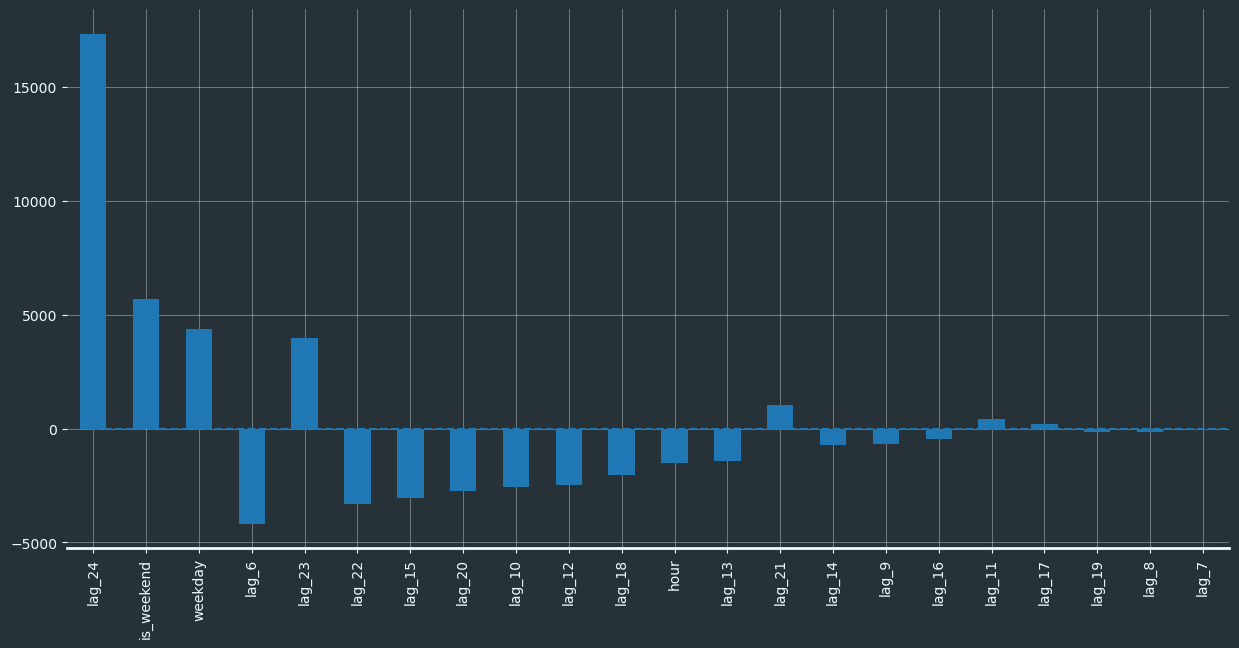

In [72]:
y = data.dropna().y
X = data.dropna().drop(["y"], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

### Target encoding

In [73]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

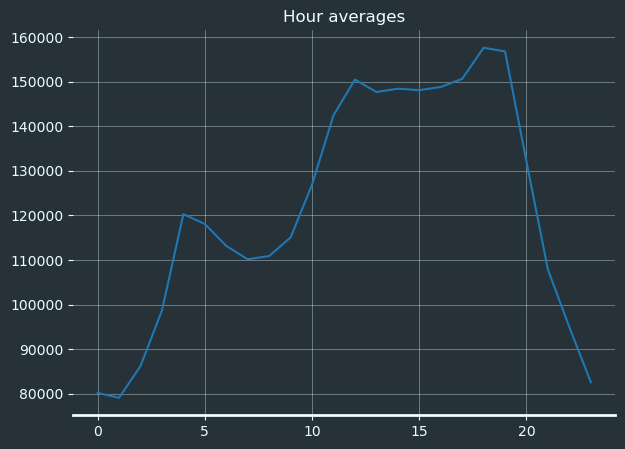

In [74]:
average_hour = code_mean(data, "hour", "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient="index")[0].plot()
plt.grid(True);

In [79]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable
            example - lag_start = 1 means that the model
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset

    """

    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]

    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    # datetime features
    #data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data["is_weekend"] = data.weekday.isin([5, 6]) * 1

    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna()) * (1 - test_size))
        data["weekday_average"] = list(
            map(code_mean(data[:test_index], "weekday", "y").get, data.weekday)
        )
        data["hour_average"] = list(
            map(code_mean(data[:test_index], "hour", "y").get, data.hour)
        )

        # drop encoded variables
        data.drop(["hour", "weekday"], axis=1, inplace=True)

    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(["y"], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(
        X, y, test_size=test_size
    )

    return X_train, X_test, y_train, y_test

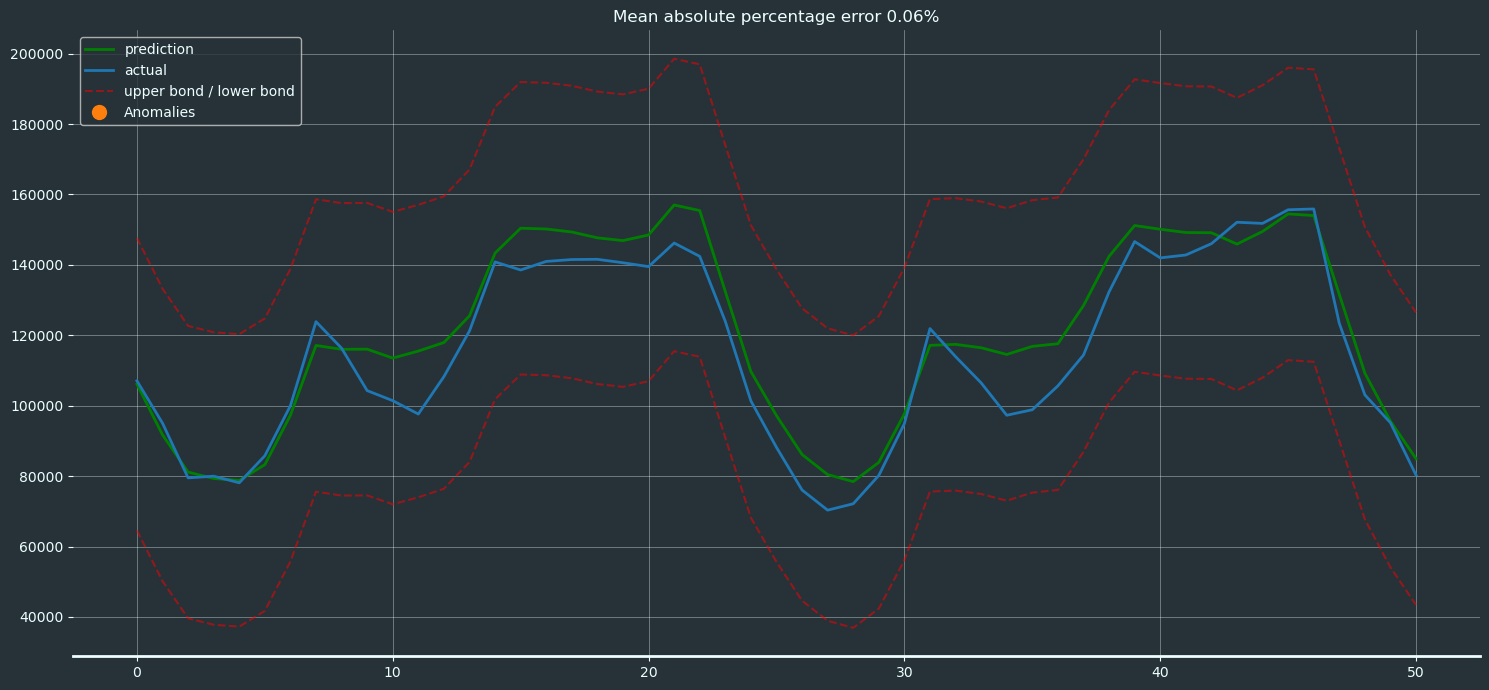

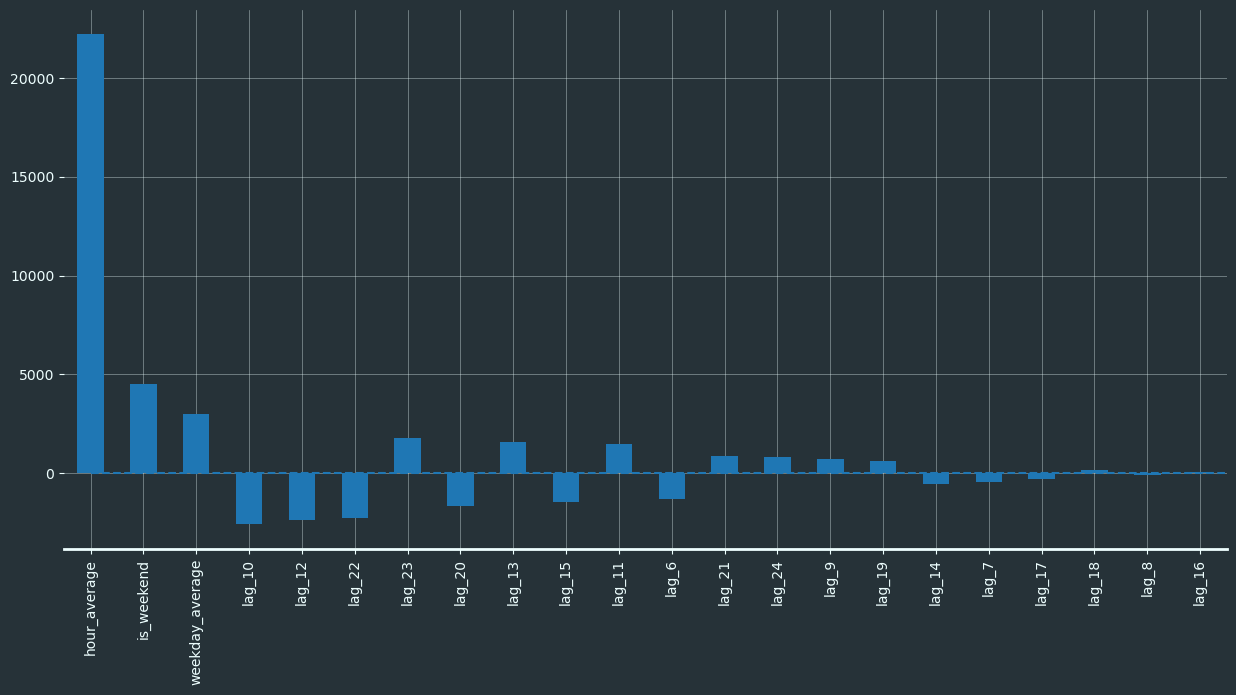

In [82]:
X_train, X_test, y_train, y_test = prepareData(
    ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(
    lr,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    plot_intervals=True,
    plot_anomalies=True,
)
plotCoefficients(lr)

In [83]:
X_train, X_test, y_train, y_test = prepareData(
    ads.Ads, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regularization and feature selection

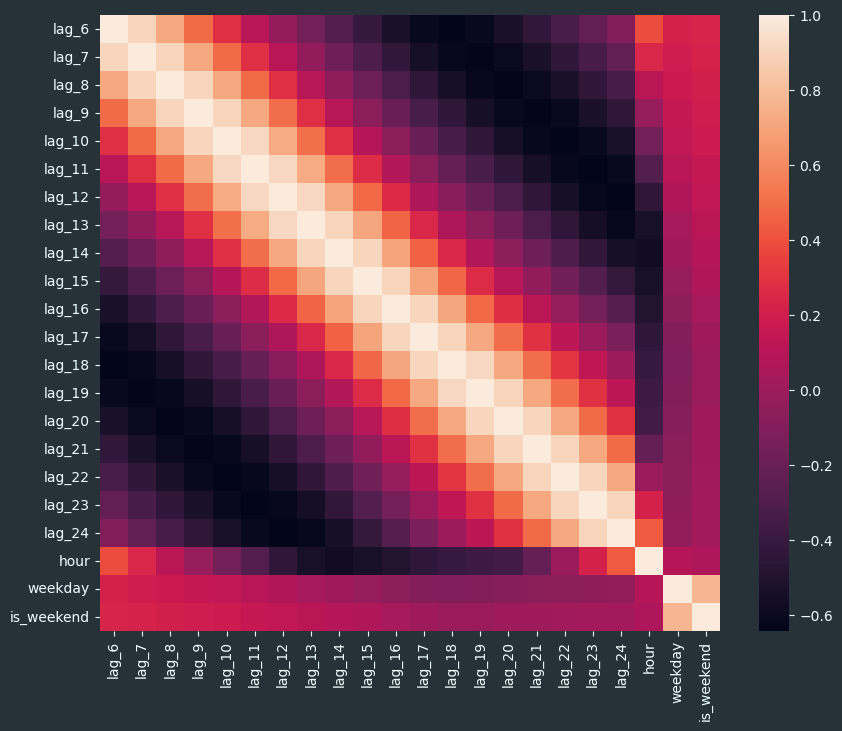

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

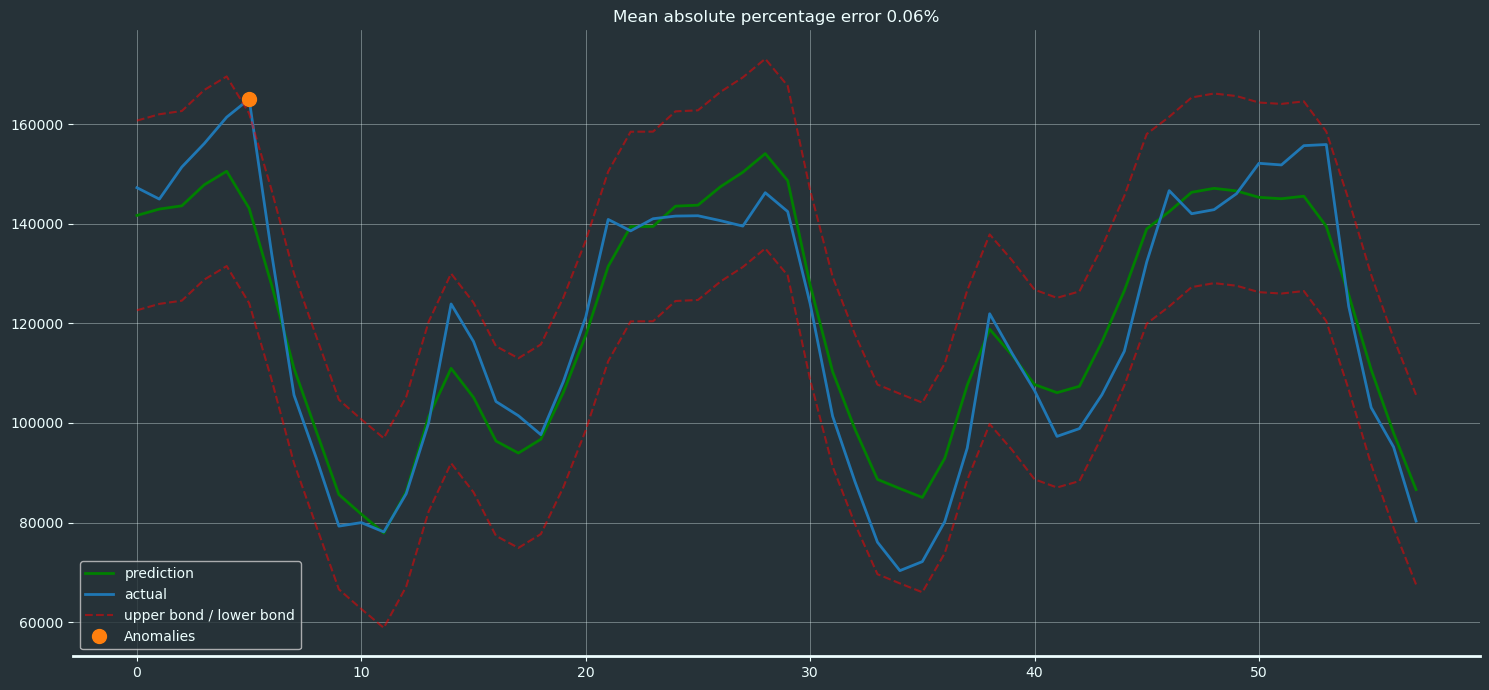

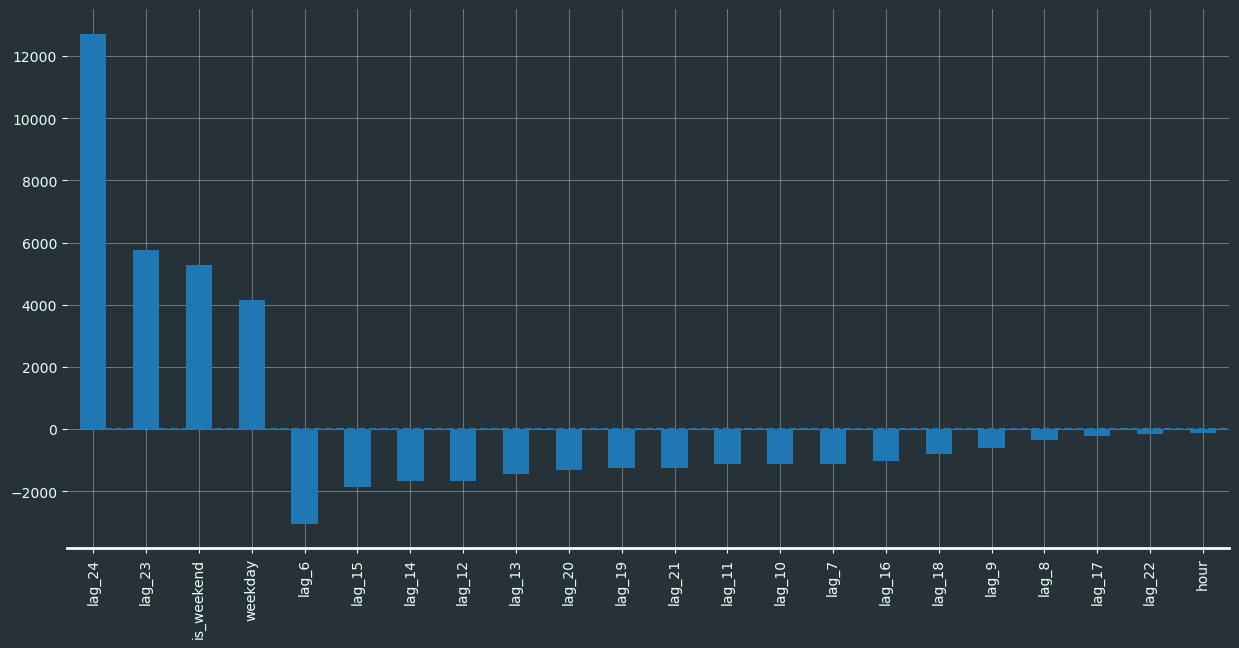

In [85]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(
    ridge,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    plot_intervals=True,
    plot_anomalies=True,
)
plotCoefficients(ridge)

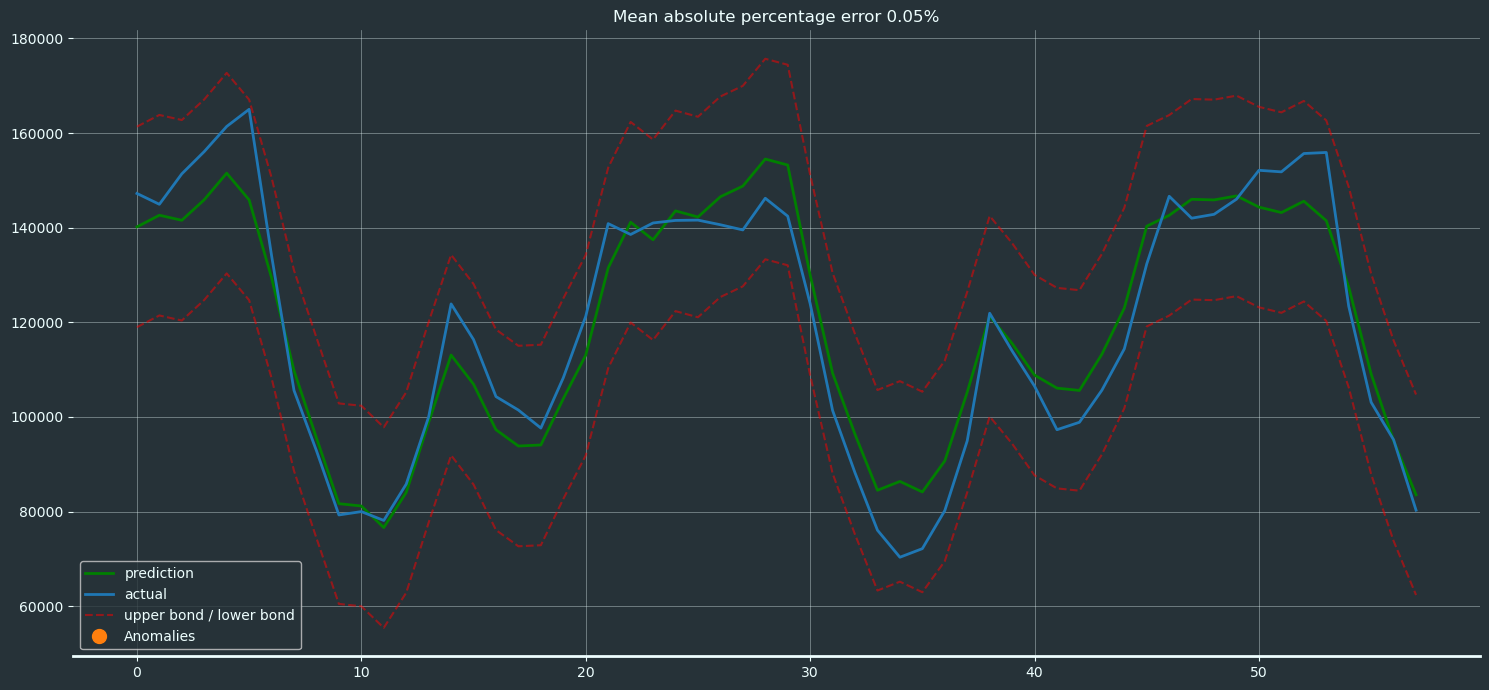

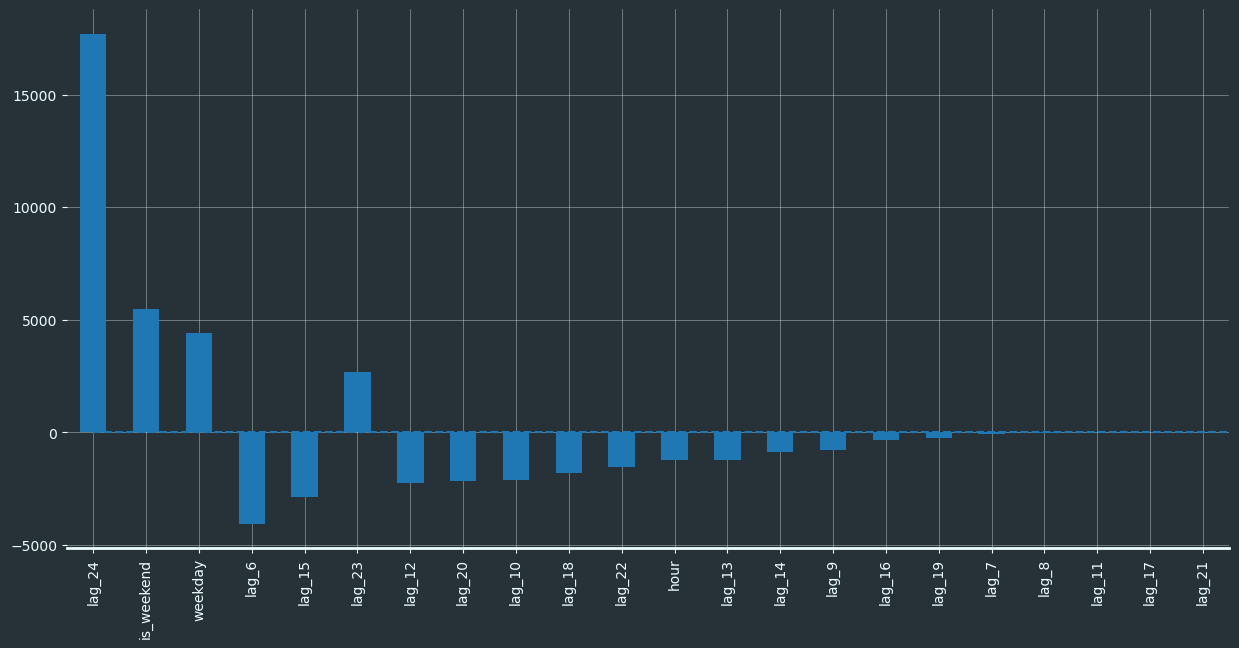

In [86]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(
    lasso,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    plot_intervals=True,
    plot_anomalies=True,
)
plotCoefficients(lasso)

## Boosting

In [87]:
from xgboost import XGBRegressor

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);

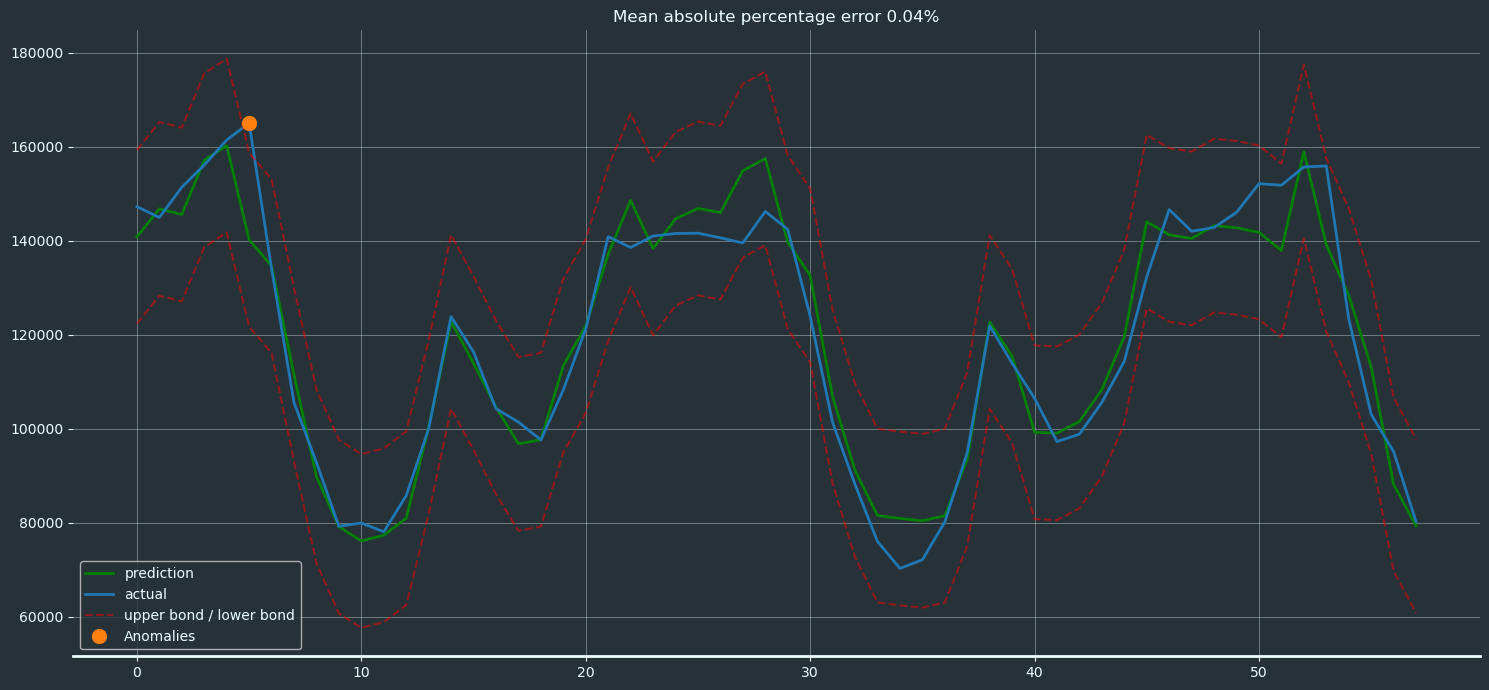

In [88]:
plotModelResults(
    xgb,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    plot_intervals=True,
    plot_anomalies=True,
)